# Data Scientist daily workflow

## step 1: import typical tools
1. **Pandas**: used for data read/write and manipulation (data must be 'structured' i.e. in table/excel sheet/tabular format (columns & rows)
2. **NumPy**: most common library for math, including matrix & vector operations and random number generation
3. **Scikit-Learn**: most common DS toolkit for Machine Learning
4. **Seaborn**: common library for static high-level visualizations
5. **Matplotlib**: common library for static low-level visualizations

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

## step 2: define variables
1. **filename**: name of the raw data file to read in
2. **target_col**: column name of the variable we are trying to predict. In our case: weather the booking was canceled or not
3. **do_rand_seed**: whether or not to use a random seed throughout the experiment (allows experiment to be reproducible).
3. **rand_seed**: an integer to use as a random seed, if 'do_random_seed' is set to True
4. **d_splits**: percent of data to go into each data split (train, val test)

In [2]:
filename = 'Hotel Reservations.csv' # the name of the data file to read in
target_col = 'booking_status' # the column that represents what we are trying to predict

do_rand_seed = True # when prototyping, setting a random seed is a good idea and best practice
rand_seed = 42

d_splits = { # proportion for data splits
    'train': .8,
    'val': .1,
    'test': .1,
}

model_file_name = "final_model.pkl" # filename to save our model to

## step 3: read in data and perform preliminary exploration

In [3]:
df = pd.read_csv(filename)

look at the first 5 rows

In [4]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


look at the last 5 rows

In [5]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


look at the first row

In [6]:
df.iloc[0]

Booking_ID                                  INN00001
no_of_adults                                       2
no_of_children                                     0
no_of_weekend_nights                               1
no_of_week_nights                                  2
type_of_meal_plan                        Meal Plan 1
required_car_parking_space                         0
room_type_reserved                       Room_Type 1
lead_time                                        224
arrival_year                                    2017
arrival_month                                     10
arrival_date                                       2
market_segment_type                          Offline
repeated_guest                                     0
no_of_previous_cancellations                       0
no_of_previous_bookings_not_canceled               0
avg_price_per_room                              65.0
no_of_special_requests                             0
booking_status                          Not_Ca

look at the names of the columns

lets look at the infered data types of each column

In [7]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

finally, lets make sure we dont have duplicate booking IDs

In [8]:
has_diplicate_ids = df['Booking_ID'].shape[0] != df['Booking_ID'].unique().shape[0]
print(f"Are there duplicate Booking IDs: {has_diplicate_ids}")
if has_diplicate_ids:
    Print(f"Here are the duplicate IDs and their counts:")
    df_dup_ids = df['Booking_ID'].value_counts()[df['Booking_ID'].value_counts() > 1].reset_index().rename(columns={'index':'Booking_ID', 'Booking_ID': 'count'}).copy()
    print(df_dup_ids)

Are there duplicate Booking IDs: False


## step 4: create data splits
+ train split: 80% of data
+ val split: 10% of data
+ test split: 10 % of data

**Special Considerations**: 
*normally* the data splits are done in a purely *random* way.  
However *time-series* data requires a very specific way of splitting data:  
+ *train* set must be composed of the *oldest* dates, 
+ *test* set must be composed of the *newest* dates,
+ *val* set must be composed of dates *after train-set dates* and *before test-set dates*

since our data contains time data, lets create a new column for a date, and look at the date range

1. convert all 'arrival_'columns to strings
2. make any single digit days and months to 2 digit (i.e. '2' and '9' become '02' and '09'
3. create a new column for a date (called 'full_arrival_date')
4. convert all 'arrival_'columns to back to integers

In [9]:
# 1. convert all 'arrival_'columns to strings
# 2. make any single digit days and months to 2 digit (i.e. '2' and '9' become '02' and '09'
df['arrival_year'] = df['arrival_year'].astype(str).str.zfill(2)
df['arrival_month'] = df['arrival_month'].astype(str).str.zfill(2)
df['arrival_date'] = df['arrival_date'].astype(str).str.zfill(2)


# 3. create a new column for a date (called 'full_arrival_date')
df['full_arrival_date'] = df['arrival_year'] + '-' + df['arrival_month'] + '-' + df['arrival_date']

df['arrival_year'] = df['arrival_year'].astype(int)
df['arrival_month'] = df['arrival_month'].astype(int)
df['arrival_date'] = df['arrival_date'].astype(int)

In [10]:
# check if datetiem coercion works
# pd.to_datetime(df['full_arrival_date'])

In [11]:
df_old = df.copy()
df['full_arrival_date'] = pd.to_datetime(df['full_arrival_date'], errors='coerce')

In [12]:
df.dtypes

Booking_ID                                      object
no_of_adults                                     int64
no_of_children                                   int64
no_of_weekend_nights                             int64
no_of_week_nights                                int64
type_of_meal_plan                               object
required_car_parking_space                       int64
room_type_reserved                              object
lead_time                                        int64
arrival_year                                     int64
arrival_month                                    int64
arrival_date                                     int64
market_segment_type                             object
repeated_guest                                   int64
no_of_previous_cancellations                     int64
no_of_previous_bookings_not_canceled             int64
avg_price_per_room                             float64
no_of_special_requests                           int64
booking_st

In [13]:
df.iloc[0]

Booking_ID                                         INN00001
no_of_adults                                              2
no_of_children                                            0
no_of_weekend_nights                                      1
no_of_week_nights                                         2
type_of_meal_plan                               Meal Plan 1
required_car_parking_space                                0
room_type_reserved                              Room_Type 1
lead_time                                               224
arrival_year                                           2017
arrival_month                                            10
arrival_date                                              2
market_segment_type                                 Offline
repeated_guest                                            0
no_of_previous_cancellations                              0
no_of_previous_bookings_not_canceled                      0
avg_price_per_room                      

let's make sure the conversion worked; we will check for null values

In [14]:
df['full_arrival_date'].isnull().sum()

37

We have some null datetime! This means that they are invalid dates.

lets look at these observations

In [15]:
df[df['full_arrival_date'].isnull()]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,full_arrival_date
2626,INN02627,2,0,1,5,Meal Plan 1,0,Room_Type 1,104,2018,2,29,Online,1,1,0,61.43,0,Canceled,NaT
3677,INN03678,1,0,1,3,Meal Plan 1,0,Room_Type 1,21,2018,2,29,Online,0,0,0,102.05,0,Canceled,NaT
5600,INN05601,2,0,1,3,Meal Plan 1,0,Room_Type 1,24,2018,2,29,Offline,0,0,0,45.50,0,Not_Canceled,NaT
6343,INN06344,1,0,1,1,Meal Plan 1,0,Room_Type 1,117,2018,2,29,Offline,0,0,0,76.00,0,Not_Canceled,NaT
7648,INN07649,2,1,1,5,Meal Plan 1,0,Room_Type 1,35,2018,2,29,Online,0,0,0,98.10,1,Canceled,NaT
8000,INN08001,2,2,1,3,Meal Plan 1,0,Room_Type 6,3,2018,2,29,Online,0,0,0,183.00,1,Not_Canceled,NaT
8989,INN08990,1,0,1,2,Meal Plan 1,0,Room_Type 1,117,2018,2,29,Offline,0,0,0,76.00,0,Not_Canceled,NaT
9153,INN09154,2,2,1,3,Meal Plan 1,0,Room_Type 6,3,2018,2,29,Online,0,0,0,189.75,0,Not_Canceled,NaT
9245,INN09246,2,0,1,3,Meal Plan 1,0,Room_Type 4,15,2018,2,29,Online,0,0,0,85.55,1,Not_Canceled,NaT
9664,INN09665,1,0,1,0,Meal Plan 1,0,Room_Type 4,21,2018,2,29,Online,0,0,0,117.00,0,Not_Canceled,NaT


What did they look like *before* we turned them into Datetime types?  
  
  
Let's look:

In [16]:
df_old[df['full_arrival_date'].isnull()]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,full_arrival_date
2626,INN02627,2,0,1,5,Meal Plan 1,0,Room_Type 1,104,2018,2,29,Online,1,1,0,61.43,0,Canceled,2018-02-29
3677,INN03678,1,0,1,3,Meal Plan 1,0,Room_Type 1,21,2018,2,29,Online,0,0,0,102.05,0,Canceled,2018-02-29
5600,INN05601,2,0,1,3,Meal Plan 1,0,Room_Type 1,24,2018,2,29,Offline,0,0,0,45.50,0,Not_Canceled,2018-02-29
6343,INN06344,1,0,1,1,Meal Plan 1,0,Room_Type 1,117,2018,2,29,Offline,0,0,0,76.00,0,Not_Canceled,2018-02-29
7648,INN07649,2,1,1,5,Meal Plan 1,0,Room_Type 1,35,2018,2,29,Online,0,0,0,98.10,1,Canceled,2018-02-29
8000,INN08001,2,2,1,3,Meal Plan 1,0,Room_Type 6,3,2018,2,29,Online,0,0,0,183.00,1,Not_Canceled,2018-02-29
8989,INN08990,1,0,1,2,Meal Plan 1,0,Room_Type 1,117,2018,2,29,Offline,0,0,0,76.00,0,Not_Canceled,2018-02-29
9153,INN09154,2,2,1,3,Meal Plan 1,0,Room_Type 6,3,2018,2,29,Online,0,0,0,189.75,0,Not_Canceled,2018-02-29
9245,INN09246,2,0,1,3,Meal Plan 1,0,Room_Type 4,15,2018,2,29,Online,0,0,0,85.55,1,Not_Canceled,2018-02-29
9664,INN09665,1,0,1,0,Meal Plan 1,0,Room_Type 4,21,2018,2,29,Online,0,0,0,117.00,0,Not_Canceled,2018-02-29


In [17]:
print(f"number of invalid date rows: {df_old[df['full_arrival_date'].isnull()].shape[0]}")

number of invalid date rows: 37


now lets look at the previous date '2018-02-28'

In [18]:
df[df['full_arrival_date'] == '2018-02-28']

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,full_arrival_date
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28
314,INN00315,2,0,2,1,Meal Plan 1,0,Room_Type 1,26,2018,2,28,Offline,0,0,0,87.00,0,Not_Canceled,2018-02-28
356,INN00357,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28
486,INN00487,2,0,2,0,Meal Plan 1,0,Room_Type 1,34,2018,2,28,Complementary,0,0,0,6.50,1,Not_Canceled,2018-02-28
495,INN00496,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35628,INN35629,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,2,28,Offline,0,0,0,61.00,0,Canceled,2018-02-28
36063,INN36064,2,2,2,2,Meal Plan 1,0,Room_Type 6,54,2018,2,28,Online,0,0,0,148.33,0,Canceled,2018-02-28
36096,INN36097,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,2,28,Offline,0,0,0,76.00,0,Not_Canceled,2018-02-28
36107,INN36108,2,0,2,2,Meal Plan 1,0,Room_Type 1,7,2018,2,28,Offline,0,0,0,87.00,0,Not_Canceled,2018-02-28


now we can assume this was a mistake ('2018-02-29') but now what do we do with it?

we *could* assume that it was for the previous date ('2018-02-28')... but that could be totally false!  
  
what if it's the *year* that's wrong?  
  
or what if it's the *month* that's wrong?  

let's check how many rows there are total

In [19]:
df.shape[0]

36275

Since we have over 36k observations, and because I don't know what the mistake is, I'm going to go ahead and drop these observations.  
  
dropping is NOT always the right answer.  
  
If we had very few total observations, I might not have done this

In [20]:
df = df[~df['full_arrival_date'].isnull()]

In [21]:
df['full_arrival_date'].isnull().sum()

0

In [22]:
del df_old

now lets looks at the date range

In [23]:
print(df['full_arrival_date'].min())
print(df['full_arrival_date'].max())

2017-07-01 00:00:00
2018-12-31 00:00:00


ideally, we'd have several years of data (4-5), so the time-series splititng might be better suited for this.  
since we only have 1.5 years of data, it might be best just to do a random split  

however, I do think that 'seasonality' will have an effect on this (probability of canceling might be higher or lower depending on month),  
and since we do have 2 seasons of winter, i think it's safe to do a time series split.  

for the sake of simplicity, we will do a **random split**, but please note **this is not correct** and we **should do a time series split**
  
**note**: Scikit-Learn has a method to create these splits automatically; however I don't like using it myself because I prefer to manually do things myself

In [24]:
def regular_rand_split_df(df,
                          d_splits=d_splits,
                          do_rand_seed=do_rand_seed,
                          rand_seed=rand_seed,
                         ):
    df_out = df.copy()
    
    if do_rand_seed == True:
        np.random.seed(rand_seed)
    df_out['rand_num'] = np.random.uniform(size=df_out.shape[0])
    
    
    df_out['d_split'] = 'train'
    
    cur_split_thresh = d_splits['test'] + d_splits['val']
    split_mask = df_out['rand_num'] <= cur_split_thresh
    df_out.loc[split_mask, 'd_split'] = 'val'
    cur_split_thresh = d_splits['test']
    split_mask = df_out['rand_num'] <= cur_split_thresh
    df_out.loc[split_mask, 'd_split'] = 'test'
    
    df_out = df_out.drop(columns=['rand_num'])
    
    df_train = df_out.loc[df_out['d_split'] == 'train'].copy().reset_index(drop=True)
    df_train = df_train.drop(columns=['d_split'])
    
    df_val = df_out.loc[df_out['d_split'] == 'val'].copy().reset_index(drop=True)
    df_val = df_val.drop(columns=['d_split'])
    
    df_test = df_out.loc[df_out['d_split'] == 'test'].copy().reset_index(drop=True)
    df_test = df_test.drop(columns=['d_split'])
    
    
    return df_train, df_val, df_test

In [25]:
df_train_rand, df_val_rand, df_test_rand = regular_rand_split_df(df)

In [26]:
def time_series_split_df(df,
                          d_splits=d_splits,
                          datetime_col='full_arrival_date',
                         ):
    df_out = df.copy()
    df_out = df_out.sort_values(datetime_col).reset_index(drop=True)
    
    nrows = df_out.shape[0]
    
    # train split
    cur_start = df_out.iloc[0][datetime_col]
    cur_end = int(nrows * d_splits['train'])
    cur_end = df_out.iloc[cur_end][datetime_col]
    
    cur_mask = (df_out[datetime_col] >= cur_start) & (df_out[datetime_col] < cur_end)
    
    df_train = df_out.loc[cur_mask].copy()
    
    # val split
    cur_start = cur_end
    cur_end = int(nrows * (d_splits['train'] + d_splits['val']))
    cur_end = df_out.iloc[cur_end][datetime_col]
    
    cur_mask = (df_out[datetime_col] >= cur_start) & (df_out[datetime_col] < cur_end)
    
    df_val = df_out.loc[cur_mask].copy()
    
    # test split
    cur_start = cur_end
    
    cur_mask = df_out[datetime_col] >= cur_start
    
    df_test = df_out.loc[cur_mask].copy()
    
    return df_train, df_val, df_test

In [27]:
df_train_ts, df_val_ts, df_test_ts = time_series_split_df(df)

Let's take a look at the differences in date ranges between splits for the random split, and the time series split

In [28]:
print("RANDOM SPLITS:")
print(f"df_train_rand: {df_train_rand['full_arrival_date'].min()} to {df_train_rand['full_arrival_date'].max()}")
print(f"df_val_rand: {df_val_rand['full_arrival_date'].min()} to {df_val_rand['full_arrival_date'].max()}")
print(f"df_test_rand: {df_test_rand['full_arrival_date'].min()} to {df_test_rand['full_arrival_date'].max()}")

RANDOM SPLITS:
df_train_rand: 2017-07-01 00:00:00 to 2018-12-31 00:00:00
df_val_rand: 2017-07-01 00:00:00 to 2018-12-31 00:00:00
df_test_rand: 2017-07-01 00:00:00 to 2018-12-31 00:00:00


In [29]:
print("TIME SERIES SPLITS:")
print(f"df_train_ts: {df_train_ts['full_arrival_date'].min()} to {df_train_ts['full_arrival_date'].max()}")
print(f"df_val_ts: {df_val_ts['full_arrival_date'].min()} to {df_val_ts['full_arrival_date'].max()}")
print(f"df_test_ts: {df_test_ts['full_arrival_date'].min()} to {df_test_ts['full_arrival_date'].max()}")

TIME SERIES SPLITS:
df_train_ts: 2017-07-01 00:00:00 to 2018-10-05 00:00:00
df_val_ts: 2018-10-06 00:00:00 to 2018-11-06 00:00:00
df_test_ts: 2018-11-07 00:00:00 to 2018-12-31 00:00:00


If my dataset is very large, I'd save these splits as separate files, and only load the training split

## Step 5: perform exploratory analysis (RANDOM SPLIT)
we must make sure to only look at our training data split

In [30]:
cur_df = df_train_rand.copy()

cur_train = df_train_rand.copy()
cur_val = df_val_rand.copy()
cur_test = df_test_rand.copy()

In [31]:
cur_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,full_arrival_date
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled,2018-12-26


lets look at some summary statistics for our dataset

In [32]:
cur_df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,29024.000000,29024.000000,29024.000000,29024.000000,29024.000000,29024.000000,29024.000000,29024.000000,29024.000000,29024.000000,29024.000000,29024.000000,29024.000000,29024.000000
mean,1.845059,0.106154,0.812087,2.206243,0.030526,85.377791,2017.818667,7.437466,15.574938,0.025462,0.022120,0.153321,103.451393,0.618626
std,0.518554,0.403186,0.870309,1.408005,0.172034,85.809322,0.385300,3.063999,8.740666,0.157525,0.346959,1.769723,35.110026,0.785677
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.150000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


lets check for **missing values**

In [33]:
cur_df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
full_arrival_date                       0
dtype: int64

WOW! we have ZERO missing values! This is a rare occurance and usually never happens. we are lucky

let's see if we have **class imbalance**

class imbalance is when we do not have equal proportions of each class we want to predict (canceled and not-canceled in our case).  
  
class imbalance can have severe negative impact on model performance

<AxesSubplot: >

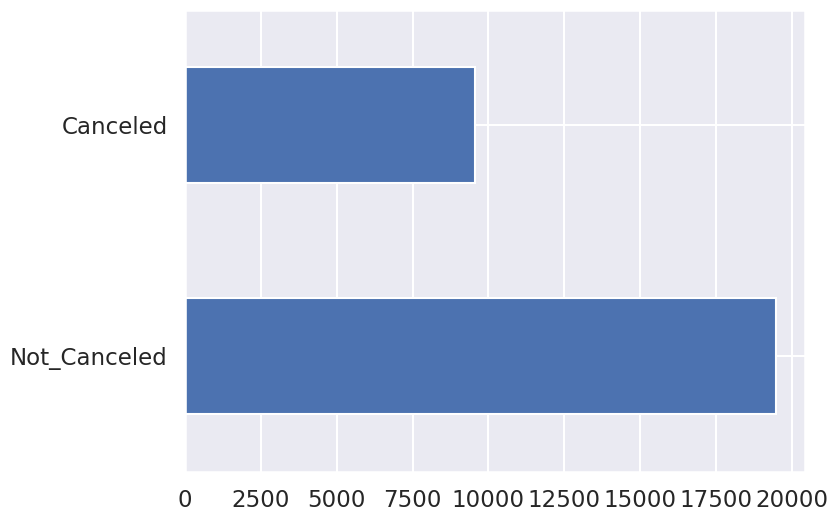

In [34]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_context("talk")
cur_df[target_col].value_counts().plot.barh()

looks like we **do** have class imbalance! will need to correct for this later

lets look at the data types again

In [35]:
cur_df.dtypes

Booking_ID                                      object
no_of_adults                                     int64
no_of_children                                   int64
no_of_weekend_nights                             int64
no_of_week_nights                                int64
type_of_meal_plan                               object
required_car_parking_space                       int64
room_type_reserved                              object
lead_time                                        int64
arrival_year                                     int64
arrival_month                                    int64
arrival_date                                     int64
market_segment_type                             object
repeated_guest                                   int64
no_of_previous_cancellations                     int64
no_of_previous_bookings_not_canceled             int64
avg_price_per_room                             float64
no_of_special_requests                           int64
booking_st

lets split the columns into 3 groups:
+ values (ints and floats)
+ categories (object types)
+ datetime (full arrival date)

In [36]:
value_cols = cur_df.dtypes[((cur_df.dtypes == float) | (cur_df.dtypes == int))].index.tolist()
value_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [37]:
cat_cols = cur_df.dtypes[cur_df.dtypes == object].index.tolist()
cat_cols

['Booking_ID',
 'type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

In [38]:
dt_col = ['full_arrival_date']
dt_col

['full_arrival_date']

Well count the number of unique values in each value column
+ bar plot for low number of unique values
+ density plot for high number of unique values

In [39]:
for a_col in value_cols:
    print(f"{a_col}: {cur_df[a_col].value_counts().shape[0]}")


no_of_adults: 5
no_of_children: 6
no_of_weekend_nights: 8
no_of_week_nights: 18
required_car_parking_space: 2
lead_time: 348
arrival_year: 2
arrival_month: 12
arrival_date: 31
repeated_guest: 2
no_of_previous_cancellations: 9
no_of_previous_bookings_not_canceled: 55
avg_price_per_room: 3485
no_of_special_requests: 6


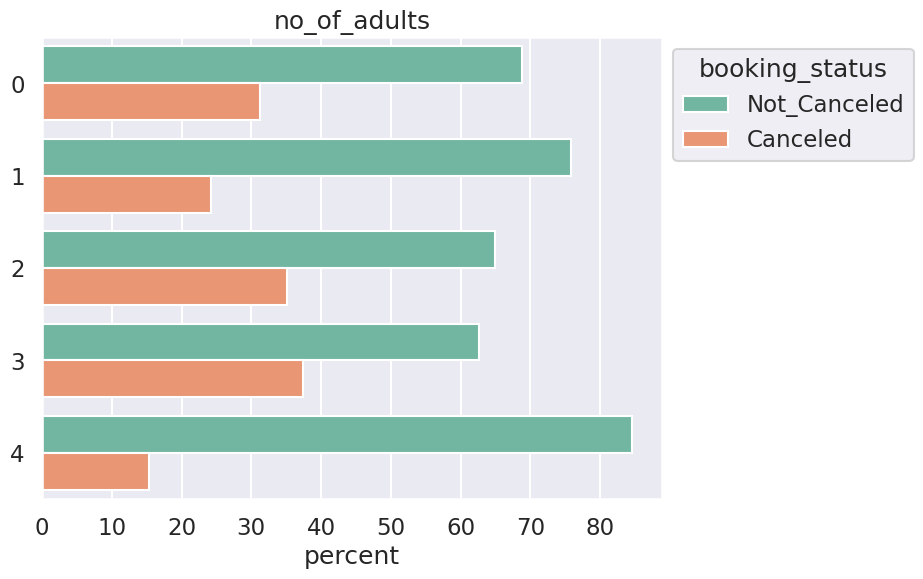

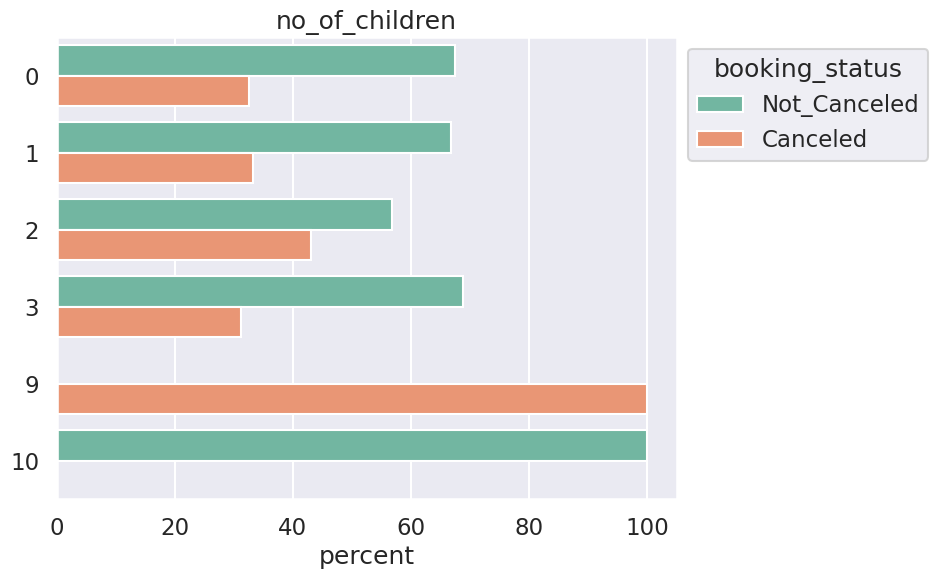

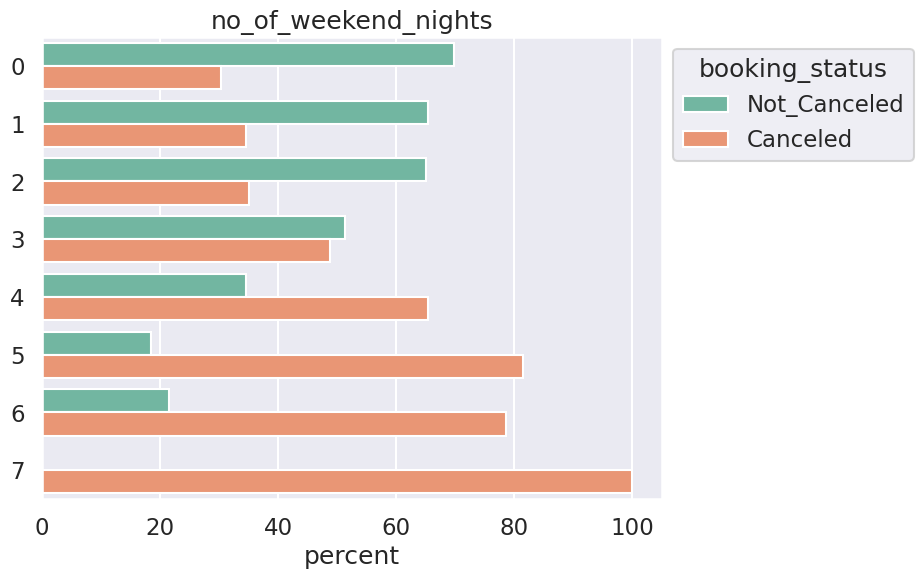

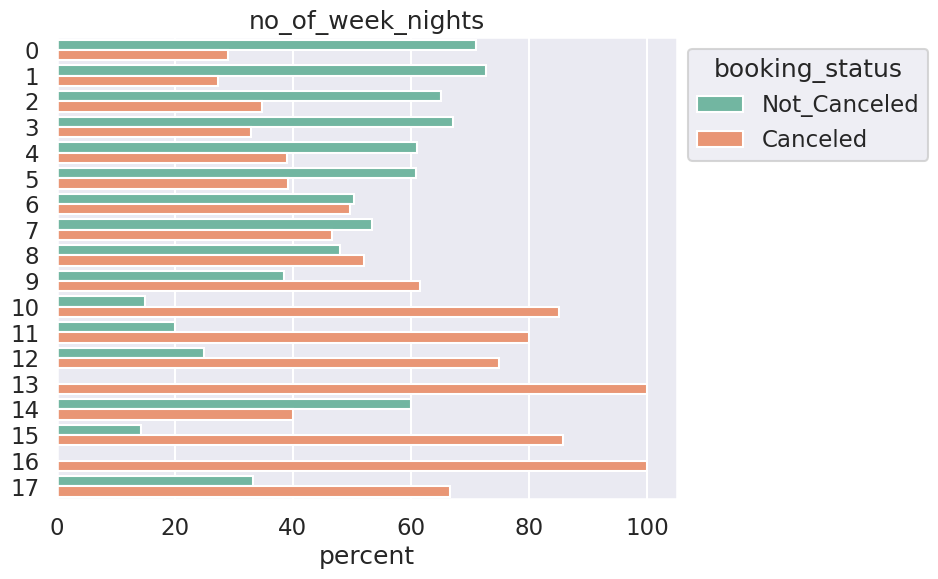

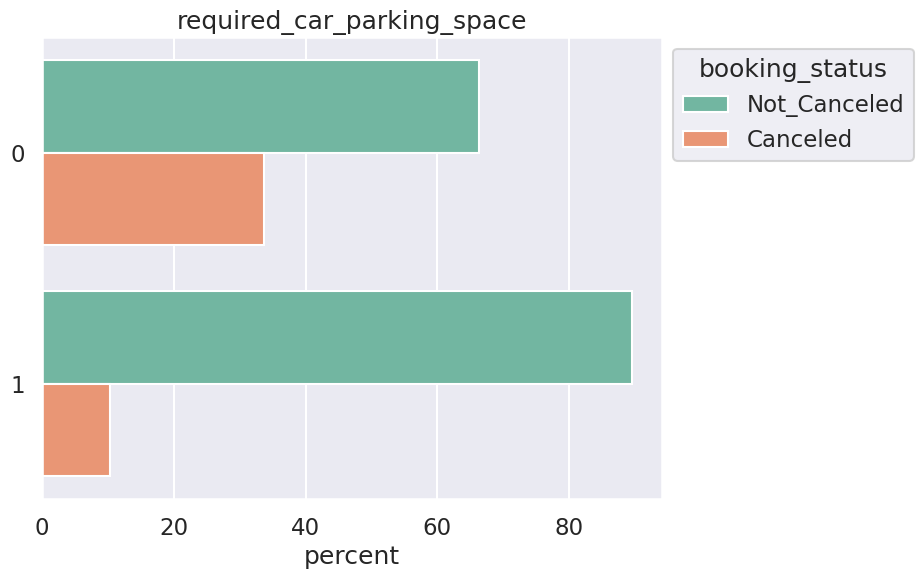

<Figure size 800x600 with 0 Axes>

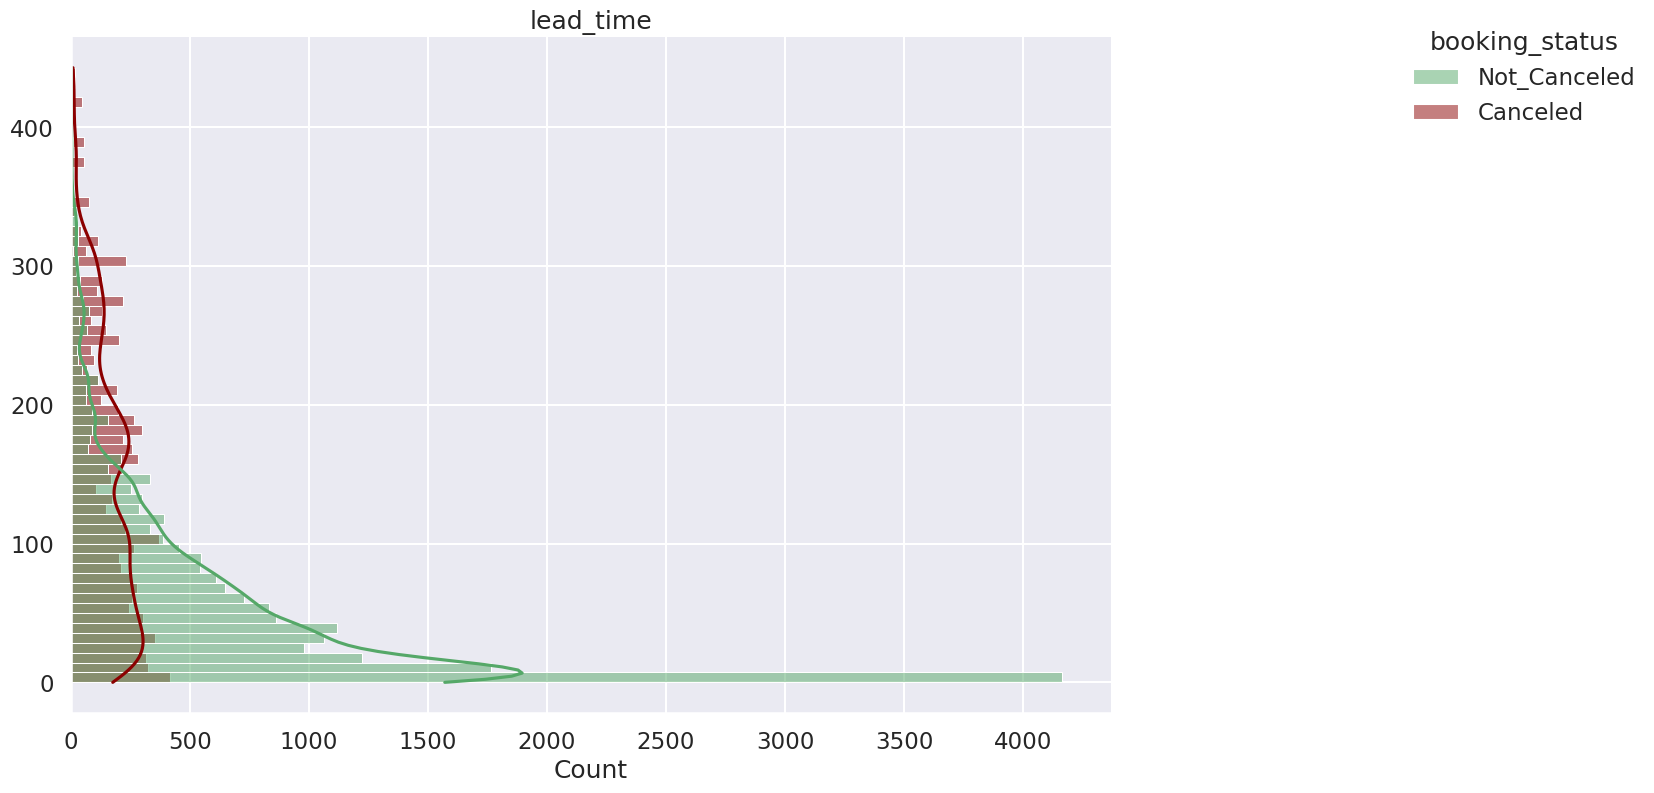

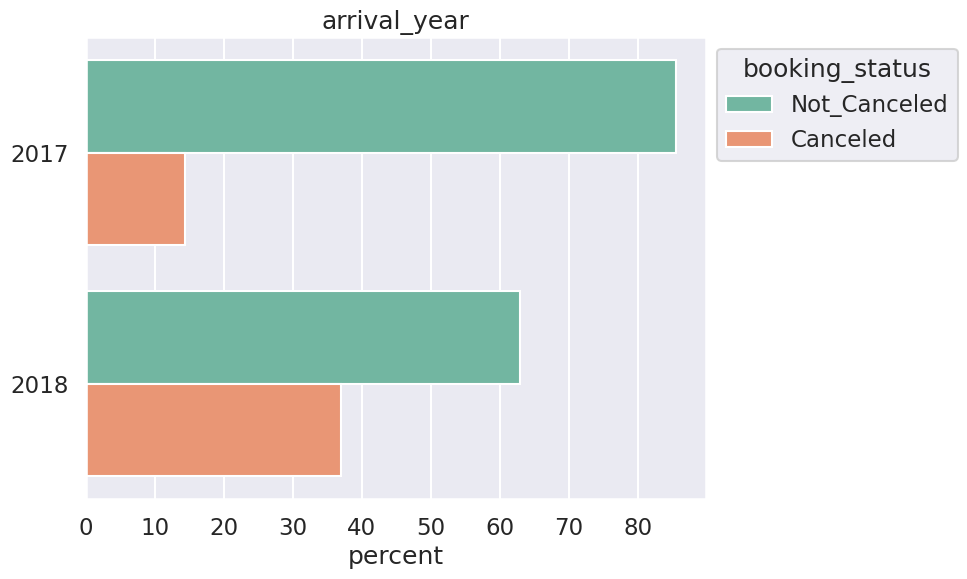

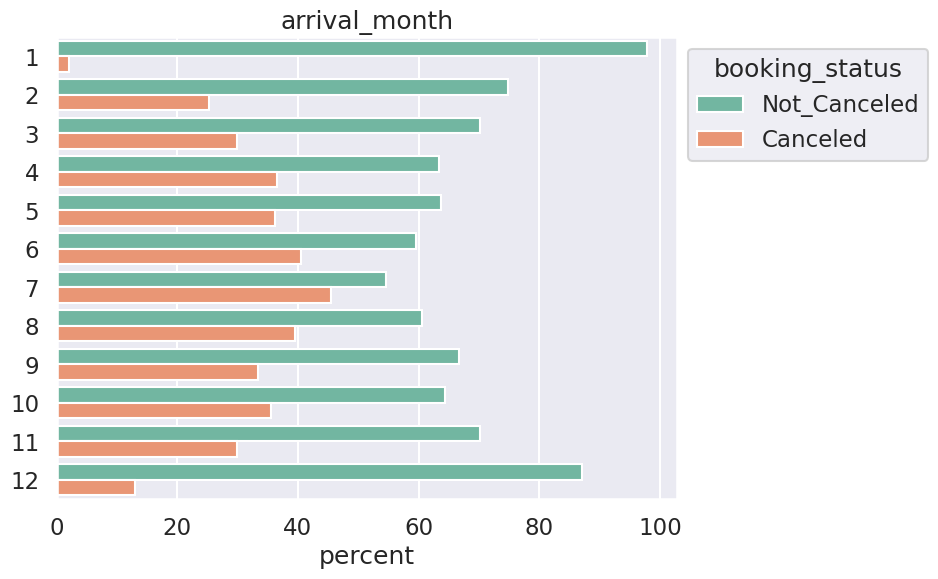

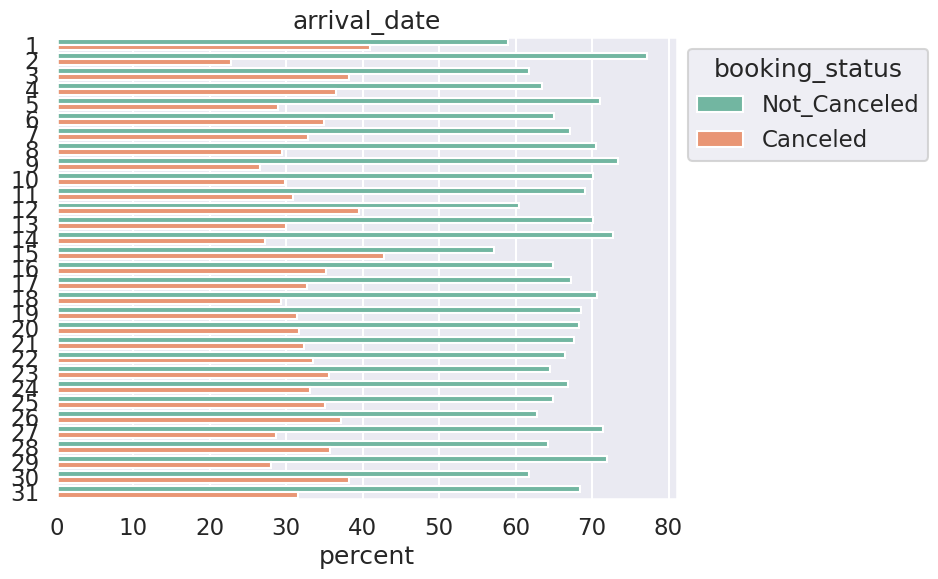

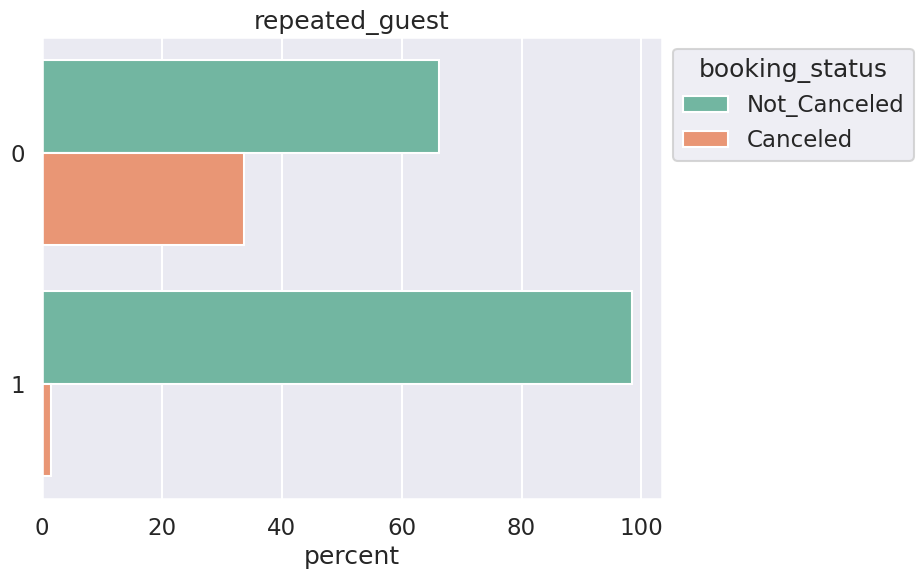

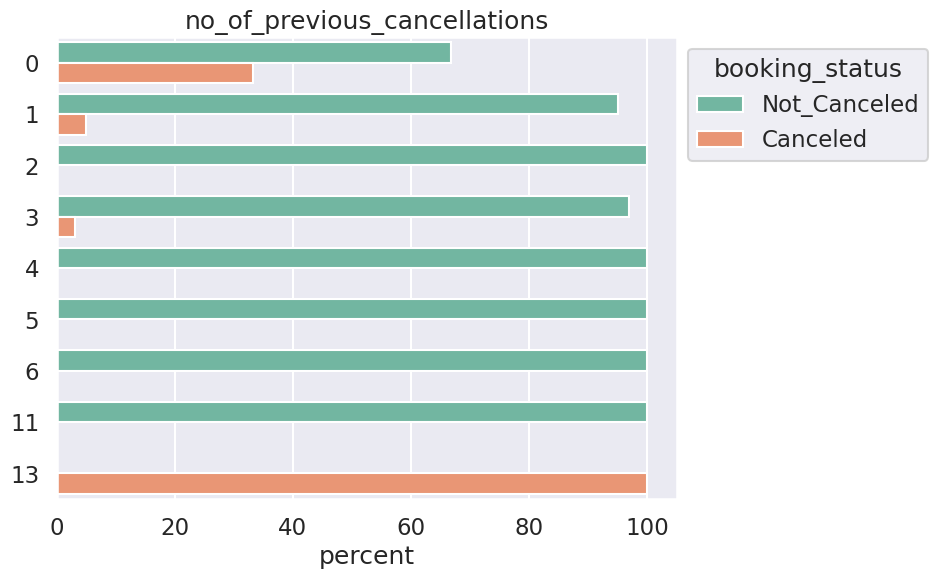

<Figure size 800x600 with 0 Axes>

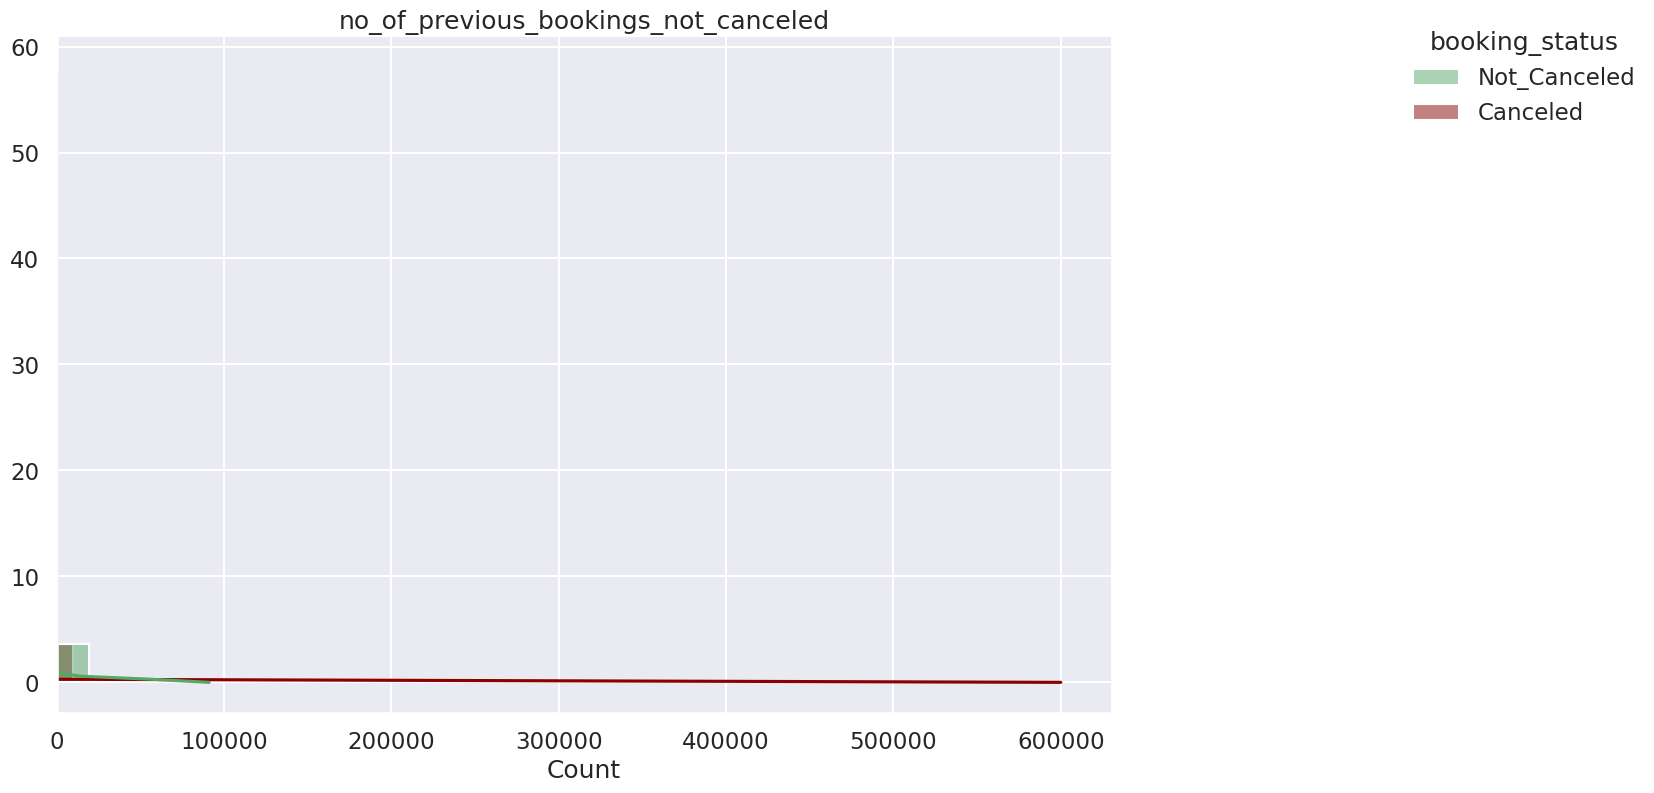

<Figure size 800x600 with 0 Axes>

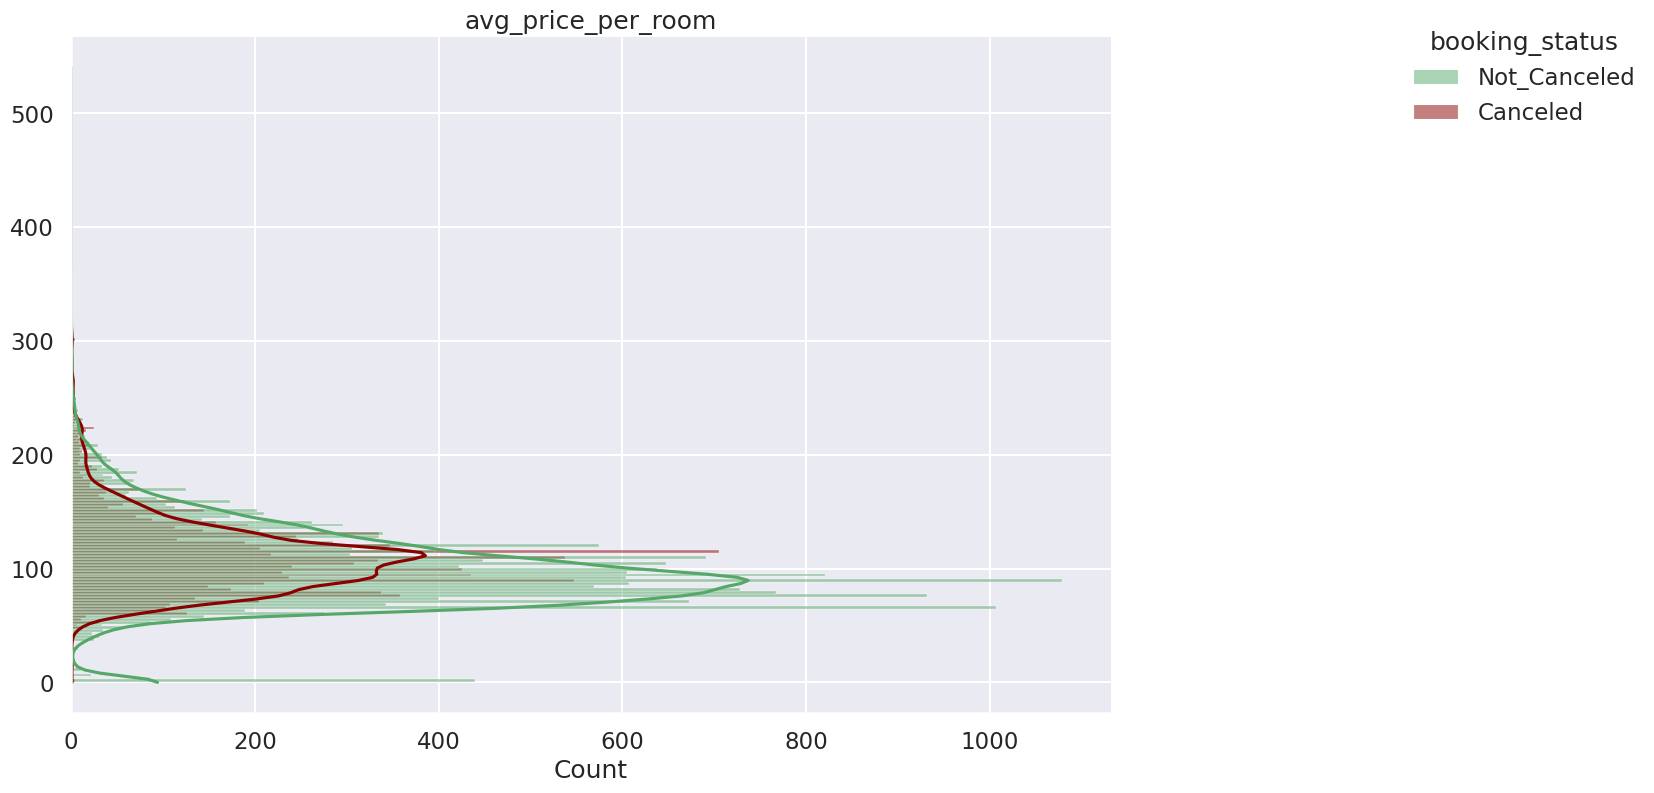

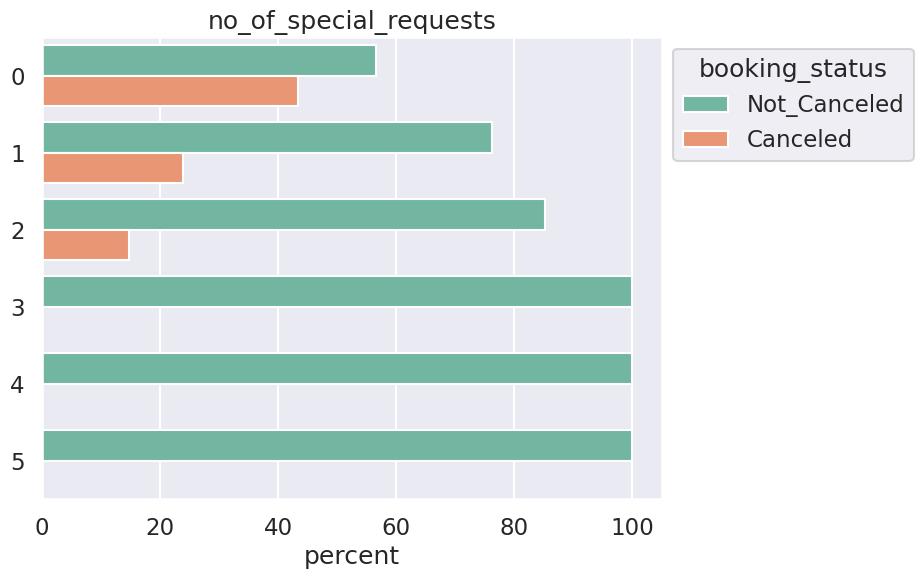

In [40]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_context("talk")
sns.set_palette('Set2')
for a_col in value_cols:
    n_unq_vals = cur_df[a_col].value_counts().shape[0]
    if n_unq_vals <= 31:
        tmp_df = cur_df.groupby(a_col)[target_col].value_counts(normalize=True).mul(100).rename('percent').reset_index().copy()
        plt.figure()
        ax = sns.barplot(data=tmp_df, y=a_col, x='percent', hue=target_col, orient='h')
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        ax.set( ylabel=None, title=a_col)
    else:
        plt.figure()
        ax = sns.displot(data=cur_df.sort_values(target_col, ascending=False), y=a_col, hue=target_col, kde=True, aspect=1.5, height=8, palette=['g', 'darkred'])
        ax.set( ylabel=None, title=a_col)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Well count the number of unique values in each category column
+ bar plot for low number of unique values
+ density plot for high number of unique values

In [41]:
for a_col in cat_cols:
    print(f"{a_col}: {cur_df[a_col].value_counts().shape[0]}")


Booking_ID: 29024
type_of_meal_plan: 4
room_type_reserved: 7
market_segment_type: 5
booking_status: 2


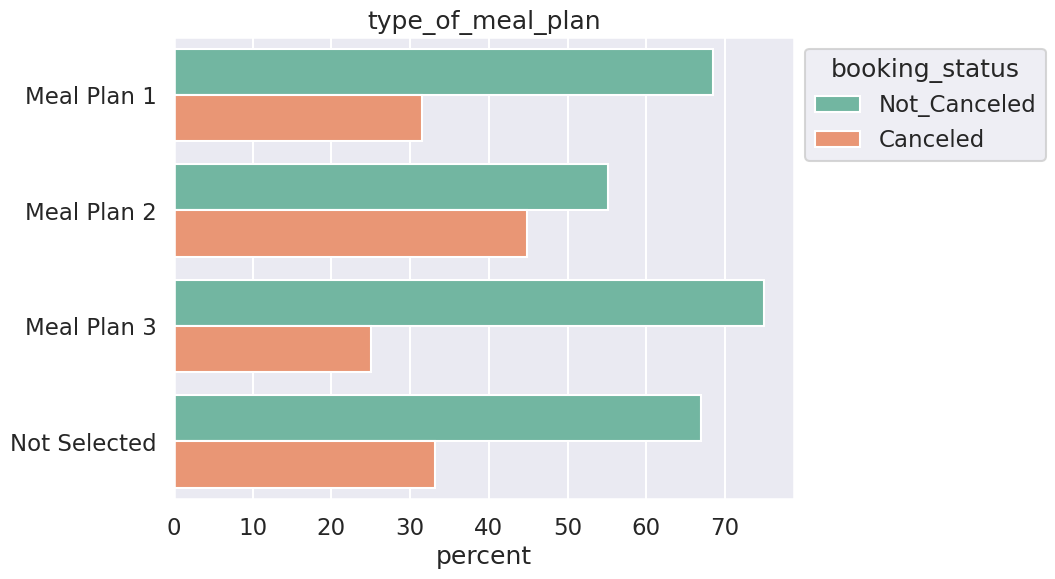

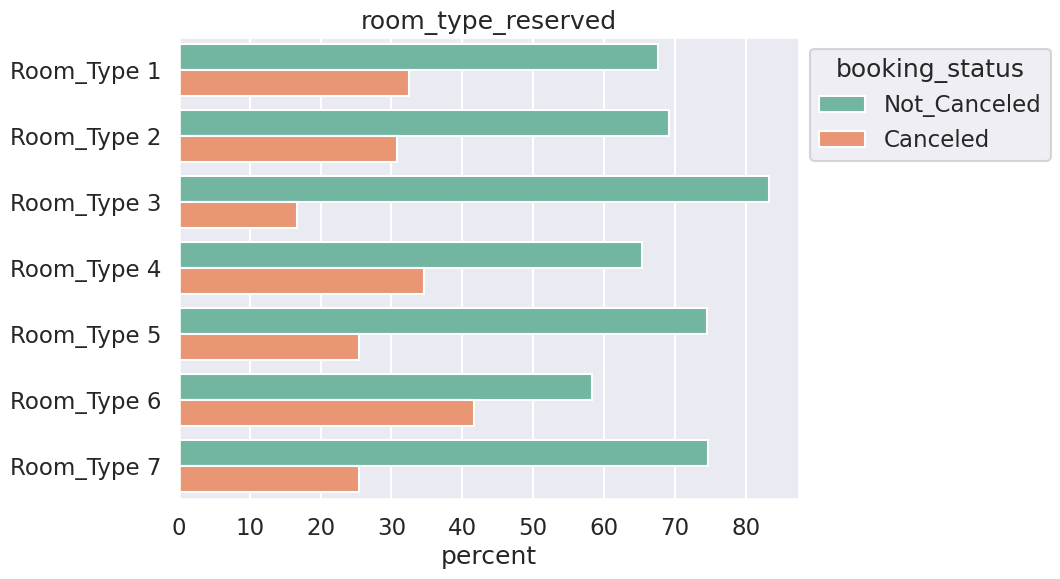

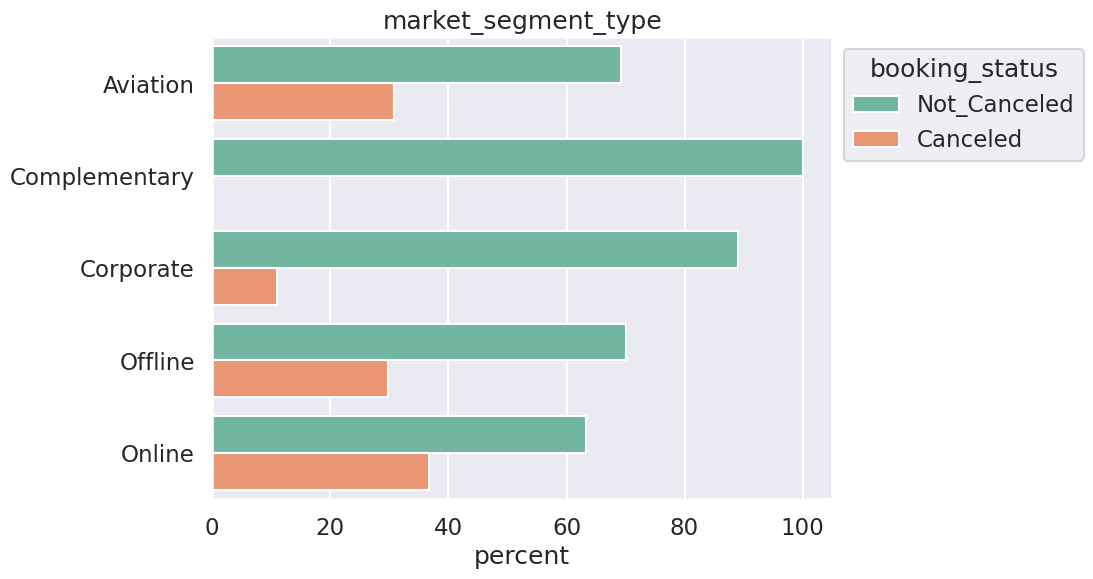

In [42]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_context("talk")
sns.set_palette('Set2')
for a_col in cat_cols:
    if (a_col == 'Booking_ID') | (a_col == target_col):
        continue
    n_unq_vals = cur_df[a_col].value_counts().shape[0]
    if n_unq_vals <= 7:
        tmp_df = cur_df.groupby(a_col)[target_col].value_counts(normalize=True).mul(100).rename('percent').reset_index().copy()
        plt.figure()
        ax = sns.barplot(data=tmp_df, y=a_col, x='percent', hue=target_col, orient='h')
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        ax.set(ylabel=None, title=a_col)
    else:
        plt.figure()
        ax = sns.displot(data=cur_df.sort_values(target_col, ascending=False), y=a_col, hue=target_col, kde=True, aspect=1.5, height=8, palette=['g', 'darkred'])
        ax.set( ylabel=None, title=a_col)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Finally, do a histogram for our full arrival date

<Figure size 800x600 with 0 Axes>

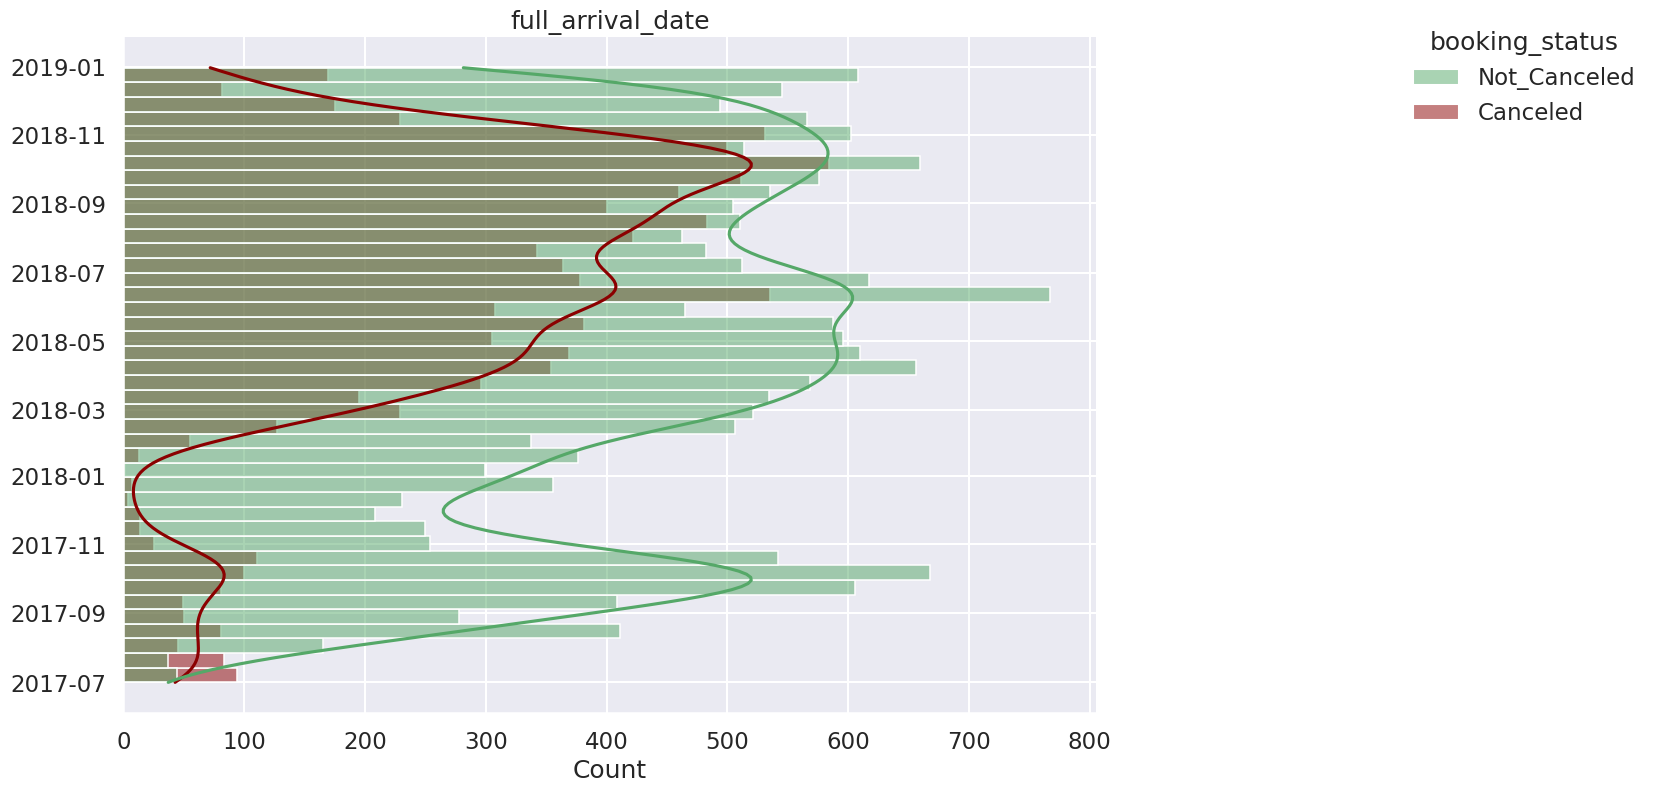

In [43]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_context("talk")
sns.set_palette('Set2')
for a_col in dt_col:
    plt.figure()
    ax = sns.displot(data=cur_df.sort_values(target_col, ascending=False), y=a_col, hue=target_col, kde=True, aspect=1.5, height=8, palette=['g', 'darkred'])#, hue_order=['Canceled', 'Not_Canceled'], palette=['coral', 'g'])
    ax.set( ylabel=None, title=a_col)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Data cleaning  
This particular dataset is very clean!
  
Nothing we need to do here!
  
**Note**: This **NEVER** happens in real life! Data cleaning tends to be most of a Data Scientist's day!

## Feature engineering
Lets create a variable for 'day of week,' which could have an impact our target variable.

If I had more access to the booking data, i'd add
+ Lat & Lon coordinates based on IP address; to get location of booking
+ lat & lon coordinated of destination
+ maybe a month-ahead weather forcast for the destination

In [44]:
def add_dow(df):
    df['day_of_week'] = df['full_arrival_date'].dt.dayofweek
    return df

def add_season(df):
    df['season'] = 'winter'
    df.loc[df['arrival_month'].isin([3,4,5]), 'season'] = 'spring'
    df.loc[df['arrival_month'].isin([6,7,8]), 'season'] = 'summer'
    df.loc[df['arrival_month'].isin([9,10,11]), 'season'] = 'autumm'
    return df

In [45]:
cur_df = add_dow(cur_df)
cur_df = add_season(cur_df)

In [46]:
cur_df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,full_arrival_date,day_of_week,season
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02,0,autumm
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06,1,autumm
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,Online,0,0,0,60.00,0,Canceled,2018-02-28,2,winter
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,Online,0,0,0,100.00,0,Canceled,2018-05-20,6,spring
4,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,...,Online,0,0,0,105.61,1,Not_Canceled,2018-12-26,2,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29019,INN36268,2,0,1,0,Not Selected,0,Room_Type 1,49,2018,...,Online,0,0,0,93.15,0,Canceled,2018-07-11,2,summer
29020,INN36269,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,2018,...,Offline,0,0,0,110.00,0,Canceled,2018-11-01,3,autumm
29021,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,...,Online,0,0,0,90.95,2,Canceled,2018-10-17,2,autumm
29022,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,...,Online,0,0,0,98.39,2,Not_Canceled,2018-07-01,6,summer


## Build Encoders
we will create one-hot-encoders for all cateogric variables

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
cat_cols

['Booking_ID',
 'type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

In [49]:
excluded_cat_cols = ['Booking_ID', 'booking_status']

In [50]:
# val_cols_for_cat_enc = ['day_of_week', 'arrival_month', 'season']
val_cols_for_cat_enc = ['season']

In [51]:
enc_cat_cols = list(set(cat_cols) - set(excluded_cat_cols)) + val_cols_for_cat_enc
enc_cat_cols

['type_of_meal_plan', 'market_segment_type', 'room_type_reserved', 'season']

In [52]:
all_encoders = {}
for a_col in enc_cat_cols:
    all_encoders[a_col] = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    all_encoders[a_col].fit(cur_df[a_col].values.reshape(-1,1))

## Build Scalers
we will build min-max scalers for all value columns 

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
value_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

we will not scale the following columns
+ **required_car_parking_space**: this is a boolean value
+ **repeated_guest**: this is a boolean values
+ **arrival_year**: don't want to anchor to this value

In [55]:
# excluded_value_cols = ['required_car_parking_space', 'repeated_guest', 'arrival_year']
excluded_value_cols = ['required_car_parking_space', 'repeated_guest'] 

In [56]:
scale_value_cols = list(set(value_cols) - set(excluded_value_cols) - set(val_cols_for_cat_enc)) + ['day_of_week']
# scale_value_cols = list(set(value_cols) - set(excluded_value_cols)) + ['day_of_week', 'season']
scale_value_cols

['no_of_special_requests',
 'no_of_previous_cancellations',
 'no_of_week_nights',
 'no_of_weekend_nights',
 'no_of_adults',
 'arrival_year',
 'avg_price_per_room',
 'arrival_date',
 'no_of_previous_bookings_not_canceled',
 'arrival_month',
 'no_of_children',
 'lead_time',
 'day_of_week']

In [57]:
all_scalers = {}
for a_col in scale_value_cols:
    all_scalers[a_col] = MinMaxScaler()
    all_scalers[a_col].fit(cur_df[a_col].values.reshape(-1,1))

## build transformation pipeline

first lets define our input columns

In [58]:
inpt_cols = list(set(value_cols).difference(set(excluded_value_cols))) + list(set(cat_cols).difference(set(excluded_cat_cols))) + ['day_of_week', 'season'] + excluded_value_cols
inpt_cols

['no_of_special_requests',
 'no_of_previous_cancellations',
 'no_of_week_nights',
 'no_of_weekend_nights',
 'no_of_adults',
 'arrival_year',
 'avg_price_per_room',
 'arrival_date',
 'no_of_previous_bookings_not_canceled',
 'lead_time',
 'arrival_month',
 'no_of_children',
 'type_of_meal_plan',
 'market_segment_type',
 'room_type_reserved',
 'day_of_week',
 'season',
 'required_car_parking_space',
 'repeated_guest']

first we will do one hot encoding transforms

In [59]:
def one_hot_transf_series(a_series, 
                          an_enc,
                         ):
    base_col_name = a_series.name
    
    enc_vals = an_enc.transform(a_series.values.reshape(-1,1))
    n_cols = enc_vals.shape[1]
    
    new_col_names = [f"{base_col_name}_{str(col_num)}" for col_num in np.arange(n_cols)]
    
    new_df = pd.DataFrame(enc_vals, columns=new_col_names, index=a_series.index)
    
    return new_df

def one_hot_transf_df(a_df, 
                      a_col, 
                      an_enc,
                     ):
    
    out_df = a_df.copy()
    new_df = one_hot_transf_series(out_df[a_col], an_enc)
    out_df = out_df.drop(columns=[a_col])
    out_df = pd.concat([out_df, new_df], axis=1)
    
    return out_df
    
def all_enc_transf_df(a_df, 
                     all_encoders=all_encoders,
                     ):
    out_df = a_df.copy()
    
    for a_col, an_enc in all_encoders.items():
        out_df = one_hot_transf_df(out_df, a_col, an_enc)
        
    return out_df
    

In [60]:
one_hot_transf_series(cur_df['type_of_meal_plan'], all_encoders['type_of_meal_plan'])
# one_hot_transf_series(df_val_ts['type_of_meal_plan'], all_encoders['type_of_meal_plan'])

,type_of_meal_plan_0,type_of_meal_plan_1,type_of_meal_plan_2,type_of_meal_plan_3
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
29019,0.0,0.0,0.0,1.0
29020,1.0,0.0,0.0,0.0
29021,1.0,0.0,0.0,0.0
29022,1.0,0.0,0.0,0.0


In [61]:
one_hot_transf_df(cur_df, 'type_of_meal_plan', all_encoders['type_of_meal_plan'])
# one_hot_transf_df(df_val_ts, 'type_of_meal_plan', all_encoders['type_of_meal_plan'])

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,avg_price_per_room,no_of_special_requests,booking_status,full_arrival_date,day_of_week,season,type_of_meal_plan_0,type_of_meal_plan_1,type_of_meal_plan_2,type_of_meal_plan_3
0,INN00001,2,0,1,2,0,Room_Type 1,224,2017,10,...,65.00,0,Not_Canceled,2017-10-02,0,autumm,1.0,0.0,0.0,0.0
1,INN00002,2,0,2,3,0,Room_Type 1,5,2018,11,...,106.68,1,Not_Canceled,2018-11-06,1,autumm,0.0,0.0,0.0,1.0
2,INN00003,1,0,2,1,0,Room_Type 1,1,2018,2,...,60.00,0,Canceled,2018-02-28,2,winter,1.0,0.0,0.0,0.0
3,INN00004,2,0,0,2,0,Room_Type 1,211,2018,5,...,100.00,0,Canceled,2018-05-20,6,spring,1.0,0.0,0.0,0.0
4,INN00008,2,0,1,3,0,Room_Type 4,83,2018,12,...,105.61,1,Not_Canceled,2018-12-26,2,winter,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29019,INN36268,2,0,1,0,0,Room_Type 1,49,2018,7,...,93.15,0,Canceled,2018-07-11,2,summer,0.0,0.0,0.0,1.0
29020,INN36269,1,0,0,3,0,Room_Type 1,166,2018,11,...,110.00,0,Canceled,2018-11-01,3,autumm,1.0,0.0,0.0,0.0
29021,INN36272,2,0,1,3,0,Room_Type 1,228,2018,10,...,90.95,2,Canceled,2018-10-17,2,autumm,1.0,0.0,0.0,0.0
29022,INN36273,2,0,2,6,0,Room_Type 1,148,2018,7,...,98.39,2,Not_Canceled,2018-07-01,6,summer,1.0,0.0,0.0,0.0


In [62]:
all_enc_transf_df(cur_df)
# all_enc_transf_df(df_val_ts)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,room_type_reserved_1,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,season_0,season_1,season_2,season_3
0,INN00001,2,0,1,2,0,224,2017,10,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,INN00002,2,0,2,3,0,5,2018,11,6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,INN00003,1,0,2,1,0,1,2018,2,28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,INN00004,2,0,0,2,0,211,2018,5,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,INN00008,2,0,1,3,0,83,2018,12,26,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29019,INN36268,2,0,1,0,0,49,2018,7,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29020,INN36269,1,0,0,3,0,166,2018,11,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29021,INN36272,2,0,1,3,0,228,2018,10,17,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29022,INN36273,2,0,2,6,0,148,2018,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


next we will do the values transform

In [63]:
def scale_tranf_df(a_df, 
                   all_scalers=all_scalers,
                  ):
    
    df_out = a_df.copy() 
    
    for a_col, a_scaler in all_scalers.items():
        df_out[a_col] = a_scaler.transform(df_out[a_col].values.reshape(-1,1))
    
    return df_out



In [64]:
scale_tranf_df(cur_df)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,full_arrival_date,day_of_week,season
0,INN00001,0.50,0.0,0.142857,0.117647,Meal Plan 1,0,Room_Type 1,0.505643,0.0,...,Offline,0,0.0,0.0,0.120370,0.0,Not_Canceled,2017-10-02,0.000000,autumm
1,INN00002,0.50,0.0,0.285714,0.176471,Not Selected,0,Room_Type 1,0.011287,1.0,...,Online,0,0.0,0.0,0.197556,0.2,Not_Canceled,2018-11-06,0.166667,autumm
2,INN00003,0.25,0.0,0.285714,0.058824,Meal Plan 1,0,Room_Type 1,0.002257,1.0,...,Online,0,0.0,0.0,0.111111,0.0,Canceled,2018-02-28,0.333333,winter
3,INN00004,0.50,0.0,0.000000,0.117647,Meal Plan 1,0,Room_Type 1,0.476298,1.0,...,Online,0,0.0,0.0,0.185185,0.0,Canceled,2018-05-20,1.000000,spring
4,INN00008,0.50,0.0,0.142857,0.176471,Meal Plan 1,0,Room_Type 4,0.187359,1.0,...,Online,0,0.0,0.0,0.195574,0.2,Not_Canceled,2018-12-26,0.333333,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29019,INN36268,0.50,0.0,0.142857,0.000000,Not Selected,0,Room_Type 1,0.110609,1.0,...,Online,0,0.0,0.0,0.172500,0.0,Canceled,2018-07-11,0.333333,summer
29020,INN36269,0.25,0.0,0.000000,0.176471,Meal Plan 1,0,Room_Type 1,0.374718,1.0,...,Offline,0,0.0,0.0,0.203704,0.0,Canceled,2018-11-01,0.500000,autumm
29021,INN36272,0.50,0.0,0.142857,0.176471,Meal Plan 1,0,Room_Type 1,0.514673,1.0,...,Online,0,0.0,0.0,0.168426,0.4,Canceled,2018-10-17,0.333333,autumm
29022,INN36273,0.50,0.0,0.285714,0.352941,Meal Plan 1,0,Room_Type 1,0.334086,1.0,...,Online,0,0.0,0.0,0.182204,0.4,Not_Canceled,2018-07-01,1.000000,summer


finally, define and input_pipeline

In [65]:
def inp_pipe_df(a_df, 
               all_scalers=all_scalers,
               all_encoders=all_encoders,
               ):
    out_df = a_df.copy()
    out_df = add_dow(out_df)
    out_df = add_season(out_df)
    out_df = out_df[inpt_cols]
    out_df = scale_tranf_df(out_df, all_scalers)
    out_df = all_enc_transf_df(out_df, all_encoders)
    
    return out_df.astype(float)
    
def tar_pipe_ser(a_df, pos_val='Canceled'):
    out_ser = a_df[target_col].copy()
    out_ser[out_ser != pos_val] = '0'
    out_ser[out_ser == pos_val] = '1'
    out_ser = out_ser.astype(float)
    return out_ser
    

In [66]:
inp_pipe_df(cur_df)

,no_of_special_requests,no_of_previous_cancellations,no_of_week_nights,no_of_weekend_nights,no_of_adults,arrival_year,avg_price_per_room,arrival_date,no_of_previous_bookings_not_canceled,lead_time,...,room_type_reserved_1,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,season_0,season_1,season_2,season_3
0,0.0,0.0,0.117647,0.142857,0.50,0.0,0.120370,0.033333,0.0,0.505643,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.2,0.0,0.176471,0.285714,0.50,1.0,0.197556,0.166667,0.0,0.011287,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.058824,0.285714,0.25,1.0,0.111111,0.900000,0.0,0.002257,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.117647,0.000000,0.50,1.0,0.185185,0.633333,0.0,0.476298,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.2,0.0,0.176471,0.142857,0.50,1.0,0.195574,0.833333,0.0,0.187359,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29019,0.0,0.0,0.000000,0.142857,0.50,1.0,0.172500,0.333333,0.0,0.110609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29020,0.0,0.0,0.176471,0.000000,0.25,1.0,0.203704,0.000000,0.0,0.374718,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29021,0.4,0.0,0.176471,0.142857,0.50,1.0,0.168426,0.533333,0.0,0.514673,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29022,0.4,0.0,0.352941,0.285714,0.50,1.0,0.182204,0.000000,0.0,0.334086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [67]:
inp_pipe_df(cur_df).iloc[0]

no_of_special_requests                  0.000000
no_of_previous_cancellations            0.000000
no_of_week_nights                       0.117647
no_of_weekend_nights                    0.142857
no_of_adults                            0.500000
arrival_year                            0.000000
avg_price_per_room                      0.120370
arrival_date                            0.033333
no_of_previous_bookings_not_canceled    0.000000
lead_time                               0.505643
arrival_month                           0.818182
no_of_children                          0.000000
day_of_week                             0.000000
required_car_parking_space              0.000000
repeated_guest                          0.000000
type_of_meal_plan_0                     1.000000
type_of_meal_plan_1                     0.000000
type_of_meal_plan_2                     0.000000
type_of_meal_plan_3                     0.000000
market_segment_type_0                   0.000000
market_segment_type_

In [68]:
tar_pipe_ser(cur_df)

0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
29019    1.0
29020    1.0
29021    1.0
29022    0.0
29023    1.0
Name: booking_status, Length: 29024, dtype: float64

## modeling

In [69]:
from sklearn.linear_model import LogisticRegression
from joblib import parallel_backend
from xgboost import XGBClassifier

In [70]:
x_train = inp_pipe_df(cur_train)
y_train = tar_pipe_ser(cur_train)

x_val = inp_pipe_df(cur_val)
y_val = tar_pipe_ser(cur_val)

x_test = inp_pipe_df(cur_test)
y_test = tar_pipe_ser(cur_test)

### Logistic Regression

#### no class imbalance correction

In [71]:
%%time
with parallel_backend('threading', n_jobs=48):
    if do_rand_seed:
        logit = LogisticRegression(penalty=None, max_iter=1000, random_state=rand_seed)
    else:
        logit = LogisticRegression(penalty=None, max_iter=1000)
    logit.fit(x_train, y_train)

CPU times: user 6.97 s, sys: 26 s, total: 33 s
Wall time: 732 ms


In [72]:
val_preds = logit.predict(x_val)

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

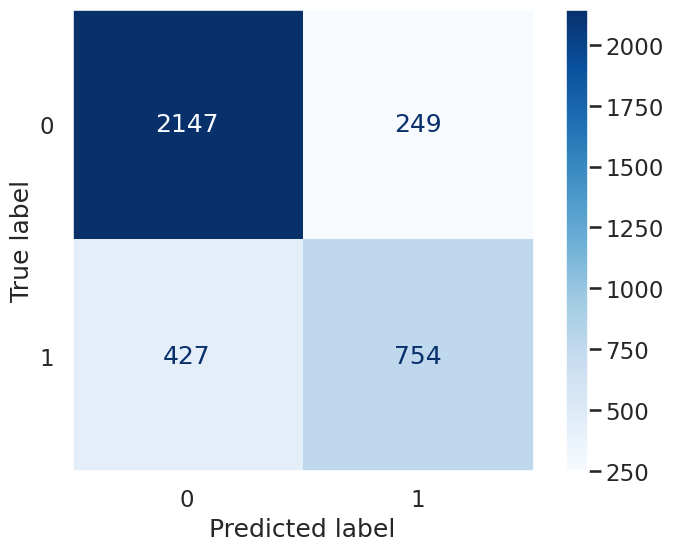

In [74]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_context("talk")
cm = confusion_matrix(y_val, val_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=sns.color_palette("Blues", as_cmap=True))
plt.grid(visible=None)

In [75]:
f1 = sk.metrics.f1_score(y_val, val_preds)
print(f"F1: {f1}")
auc = sk.metrics.roc_auc_score(y_val, val_preds)
print(f"AUC: {auc}")
recall = sk.metrics.recall_score(y_val, val_preds)
print(f"Recall: {recall}")
precision = sk.metrics.precision_score(y_val, val_preds)
print(f"Precision: {precision}")
accuracy = sk.metrics.accuracy_score(y_val, val_preds)
print(f"Accuracy: {accuracy}")

F1: 0.6904761904761905
AUC: 0.7672593964821415
Recall: 0.6384419983065199
Precision: 0.7517447657028913
Accuracy: 0.8110148168856584


#### with class imbalance correction

In [76]:
%%time
with parallel_backend('threading', n_jobs=48):
    if do_rand_seed:
        logit = LogisticRegression(penalty=None, max_iter=1000, random_state=rand_seed, class_weight='balanced')
    else:
        logit = LogisticRegression(penalty=None, max_iter=1000, class_weight='balanced')
    logit.fit(x_train, y_train)

CPU times: user 12.5 s, sys: 43.6 s, total: 56.1 s
Wall time: 1.23 s


In [77]:
val_preds = logit.predict(x_val)

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

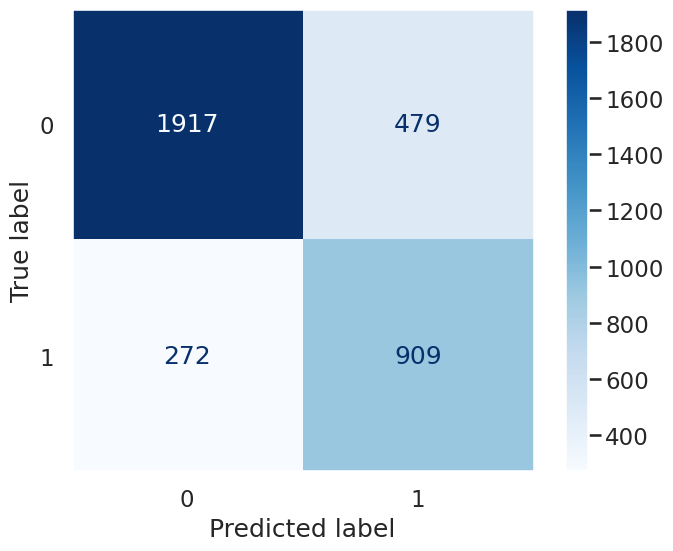

In [79]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_context("talk")
cm = confusion_matrix(y_val, val_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=sns.color_palette("Blues", as_cmap=True))
plt.grid(visible=None)

In [80]:
f1 = sk.metrics.f1_score(y_val, val_preds)
print(f"F1: {f1}")
auc = sk.metrics.roc_auc_score(y_val, val_preds)
print(f"AUC: {auc}")
recall = sk.metrics.recall_score(y_val, val_preds)
print(f"Recall: {recall}")
precision = sk.metrics.precision_score(y_val, val_preds)
print(f"Precision: {precision}")
accuracy = sk.metrics.accuracy_score(y_val, val_preds)
print(f"Accuracy: {accuracy}")

F1: 0.7076683534449202
AUC: 0.7848850893176463
Recall: 0.7696867061812024
Precision: 0.6548991354466859
Accuracy: 0.790047525859659


### Gradient boosting
no class balance

In [81]:
if do_rand_seed:
    xgb = XGBClassifier(use_label_encoder=False, random_state=rand_seed)
else:
     xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(x_train, y_train)

/home/jcosme/miniconda3/envs/p1-dlds/lib/python3.11/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [82]:
val_preds = xgb.predict(x_val)

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

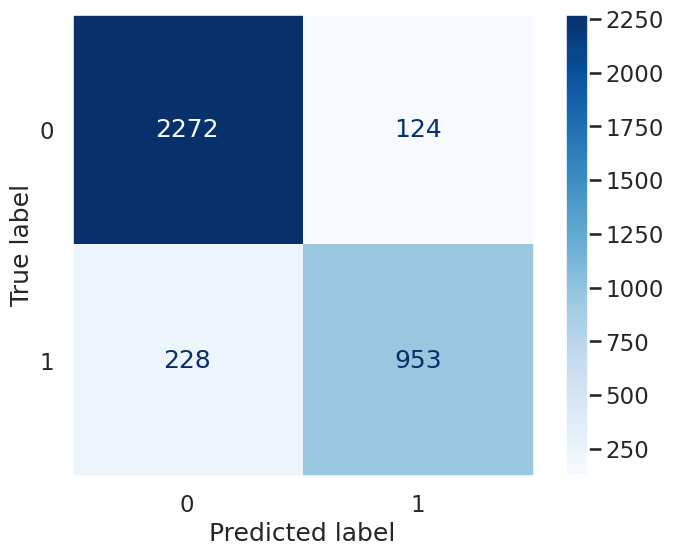

In [84]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_context("talk")
cm = confusion_matrix(y_val, val_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=sns.color_palette("Blues", as_cmap=True))
plt.grid(visible=None)

In [85]:
f1 = sk.metrics.f1_score(y_val, val_preds)
print(f"F1: {f1}")
auc = sk.metrics.roc_auc_score(y_val, val_preds)
print(f"AUC: {auc}")
recall = sk.metrics.recall_score(y_val, val_preds)
print(f"Recall: {recall}")
precision = sk.metrics.precision_score(y_val, val_preds)
print(f"Precision: {precision}")
accuracy = sk.metrics.accuracy_score(y_val, val_preds)
print(f"Accuracy: {accuracy}")

F1: 0.8441098317094774
AUC: 0.8775951734403514
Recall: 0.8069432684165961
Precision: 0.8848653667595172
Accuracy: 0.901593514117976


### Gradient boosting with scaled positive weights (for class imbalance)

In [86]:
scale_pos_weight = (y_train.shape[0] - y_train.sum()) / y_train.sum()
scale_pos_weight

2.0372540812055253

In [87]:

if do_rand_seed:
    xgb = XGBClassifier(use_label_encoder=False, 
                   scale_pos_weight=scale_pos_weight,
                 random_state=rand_seed,
                       )
else:
     xgb = XGBClassifier(use_label_encoder=False, 
                   scale_pos_weight=scale_pos_weight,
                   )
xgb.fit(x_train, y_train)

/home/jcosme/miniconda3/envs/p1-dlds/lib/python3.11/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [88]:
val_preds = xgb.predict(x_val)

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

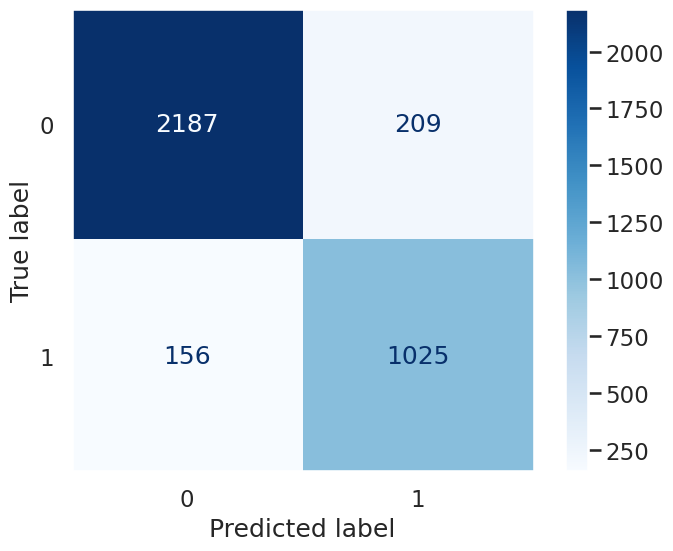

In [90]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_context("talk")
cm = confusion_matrix(y_val, val_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=sns.color_palette("Blues", as_cmap=True))
plt.grid(visible=None)

In [91]:
f1 = sk.metrics.f1_score(y_val, val_preds)
print(f"F1: {f1}")
auc = sk.metrics.roc_auc_score(y_val, val_preds)
print(f"AUC: {auc}")
recall = sk.metrics.recall_score(y_val, val_preds)
print(f"Recall: {recall}")
precision = sk.metrics.precision_score(y_val, val_preds)
print(f"Precision: {precision}")
accuracy = sk.metrics.accuracy_score(y_val, val_preds)
print(f"Accuracy: {accuracy}")

F1: 0.8488612836438922
AUC: 0.8903399187751531
Recall: 0.8679085520745131
Precision: 0.8306320907617504
Accuracy: 0.8979591836734694


### Hyper-parameter Optimization

In [92]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [93]:
space={'max_depth': hp.randint("max_depth", 1, 50),
            'gamma': hp.uniform ('gamma', .01,9),
            'n_estimators': hp.randint("n_estimators", 10, 300),
           'learning_rate': hp.uniform('learning_rate', 0.001 ,0.4),
           'scale_pos_weight': hp.uniform("scale_pos_weight", .1, 10),
           'early_stopping_rounds': hp.randint("early_stopping_rounds", 1, 50),
        }

In [94]:
def objective(space):
    if do_rand_seed:
        clf=XGBClassifier(
            n_estimators=space['n_estimators'], 
            max_depth = space['max_depth'], 
            gamma = space['gamma'],
            learning_rate=space['learning_rate'],
            scale_pos_weight=space['scale_pos_weight'],
            early_stopping_rounds=space['early_stopping_rounds'],
            eval_metric="auc",
            tree_method='gpu_hist',
            random_state=rand_seed,
        )
        
    else:
        clf=XGBClassifier(
            n_estimators=space['n_estimators'], 
            max_depth = space['max_depth'], 
            gamma = space['gamma'],
            learning_rate=space['learning_rate'],
            scale_pos_weight=space['scale_pos_weight'],
            early_stopping_rounds=space['early_stopping_rounds'],
            eval_metric="auc",
            tree_method='gpu_hist',

        )
    
    evaluation = [( x_val, y_val)]
    
    clf.fit(x_train, y_train,
            eval_set=evaluation, 
            verbose=False,
           )
    

    val_preds = clf.predict(x_val)
    
    f1 = sk.metrics.f1_score(y_val, val_preds)
    # print(f"F1: {f1}")
    # auc = sk.metrics.roc_auc_score(y_val, val_preds)
    # print(f"AUC: {auc}")
    # recall = sk.metrics.recall_score(y_val, val_preds)
    # print(f"Recall: {recall}")
    # precision = sk.metrics.precision_score(y_val, val_preds)
    # print(f"Precision: {precision}")
    # accuracy = sk.metrics.accuracy_score(y_val, val_preds)
    # print(f"Accuracy: {accuracy}")

    
    return {'loss': -f1, 'status': STATUS_OK }

In [95]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

100%|███████| 100/100 [00:33<00:00,  2.97trial/s, best loss: -0.851243152128108]


In [96]:
print(best_hyperparams)

{'early_stopping_rounds': 42, 'gamma': 0.08423673648917344, 'learning_rate': 0.308542555728618, 'max_depth': 20, 'n_estimators': 46, 'scale_pos_weight': 2.7140181204593037}


In [97]:
if do_rand_seed:
    xgb = XGBClassifier(
                 random_state=rand_seed,
                        eval_metric="auc",
            tree_method='gpu_hist',
        **best_hyperparams
                       )
else:
     xgb = XGBClassifier(
                         eval_metric="auc",
            tree_method='gpu_hist',
         **best_hyperparams
                   )
xgb.fit(x_train, 
        y_train,
       eval_set=[( x_val, y_val)], 
       verbose=False,
       )

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=42, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0.08423673648917344,
              gpu_id=0, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.308542555728618,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=46, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

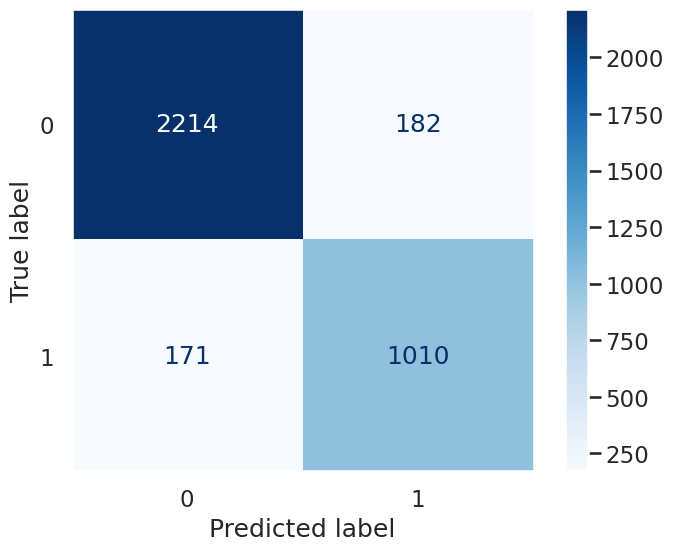

In [98]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_context("talk")
val_preds = xgb.predict(x_val)
cm = confusion_matrix(y_val, val_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=sns.color_palette("Blues", as_cmap=True))
plt.grid(visible=None)

In [99]:
f1 = sk.metrics.f1_score(y_val, val_preds)
print(f"F1: {f1}")
auc = sk.metrics.roc_auc_score(y_val, val_preds)
print(f"AUC: {auc}")
recall = sk.metrics.recall_score(y_val, val_preds)
print(f"Recall: {recall}")
precision = sk.metrics.precision_score(y_val, val_preds)
print(f"Precision: {precision}")
accuracy = sk.metrics.accuracy_score(y_val, val_preds)
print(f"Accuracy: {accuracy}")

F1: 0.851243152128108
AUC: 0.8896237590452052
Recall: 0.8552074513124471
Precision: 0.8473154362416108
Accuracy: 0.9013139502376293


### Feature Importance

In [100]:
# Creating the importances dataframe
importances = pd.DataFrame.from_dict(xgb.get_booster().get_score(importance_type = 'weight'), orient='index')

<AxesSubplot: xlabel='0', ylabel='index'>

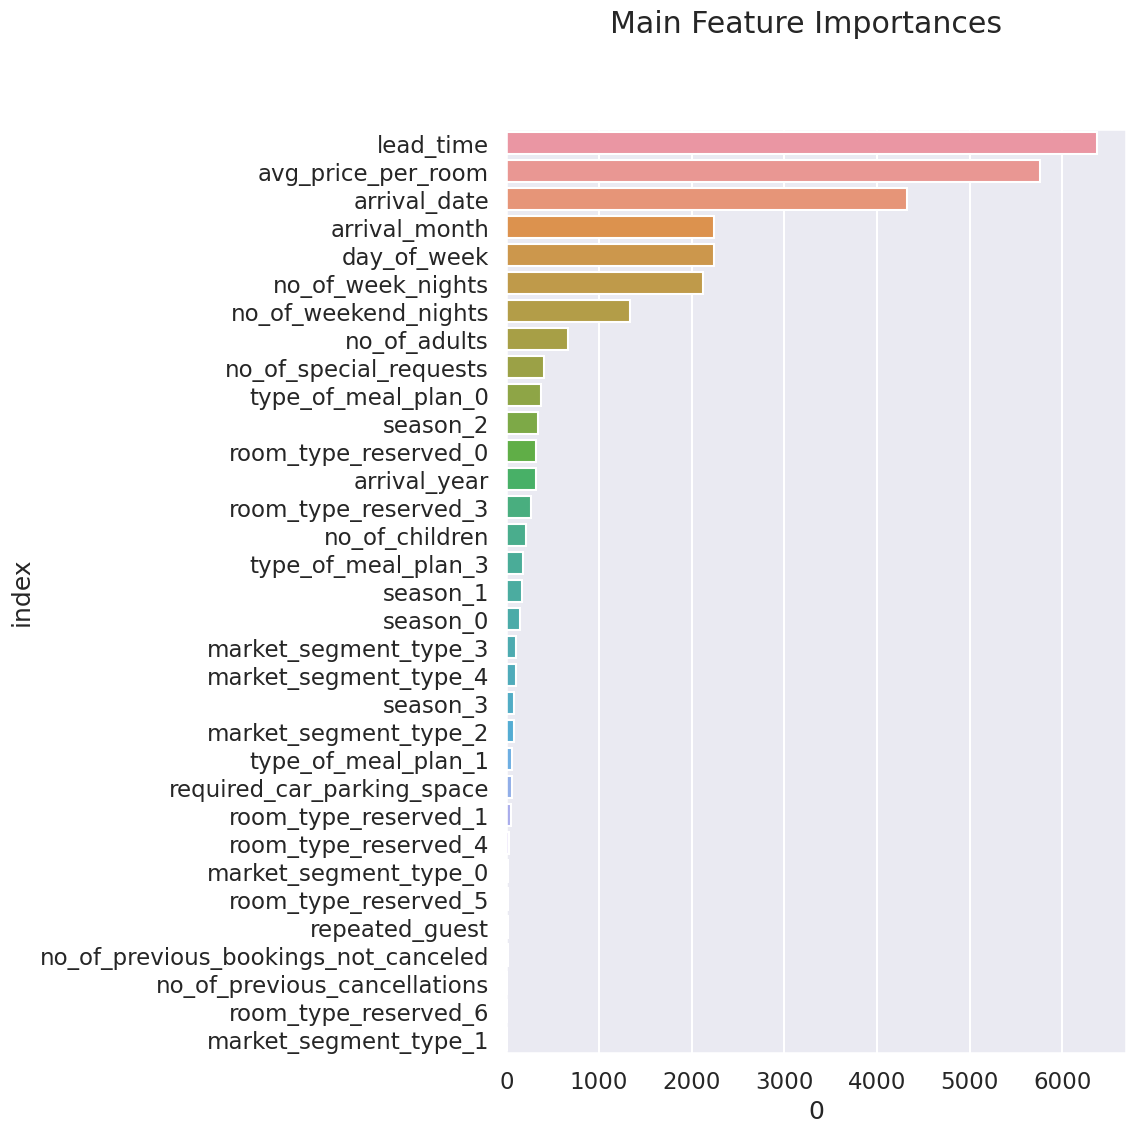

In [101]:
fig, ax = plt.subplots(1,1, figsize=(8,12))
fig.suptitle('Main Feature Importances')
sns.barplot(data=importances.reset_index().sort_values(0, ascending=False), x=0, y='index', orient='h')

### Test set evaluation

In [102]:
# save model
pickle.dump(xgb, open(model_file_name, "wb"))

In [103]:
# load model
xgb = pickle.load(open(model_file_name, "rb"))

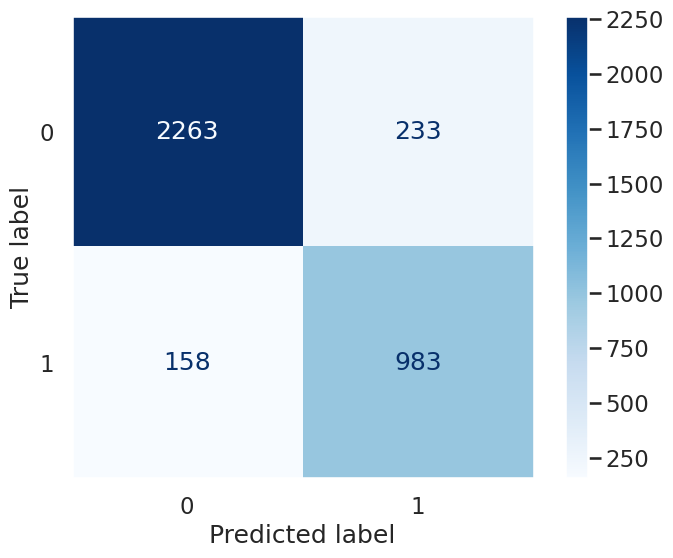

In [104]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_context("talk")
test_preds = xgb.predict(x_test)
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=sns.color_palette("Blues", as_cmap=True))
plt.grid(visible=None)

In [105]:
f1 = sk.metrics.f1_score(y_test, test_preds)
print(f"F1: {f1}")
auc = sk.metrics.roc_auc_score(y_test, test_preds)
print(f"AUC: {auc}")
recall = sk.metrics.recall_score(y_test, test_preds)
print(f"Recall: {recall}")
precision = sk.metrics.precision_score(y_test, test_preds)
print(f"Precision: {precision}")
accuracy = sk.metrics.accuracy_score(y_test, test_preds)
print(f"Accuracy: {accuracy}")

F1: 0.8341111582520153
AUC: 0.8840878095575182
Recall: 0.8615249780893953
Precision: 0.8083881578947368
Accuracy: 0.892493813582623


## Step 5: perform exploratory analysis (TIME SERIES SPLIT)
we must make sure to only look at our training data split

In [106]:
cur_df = df_train_ts.copy()

cur_train = df_train_ts.copy()
cur_val = df_val_ts.copy()
cur_test = df_test_ts.copy()

In [107]:
cur_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,full_arrival_date
0,INN09777,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Offline,0,0,0,101.5,0,Canceled,2017-07-01
1,INN26322,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Offline,0,0,0,101.5,0,Canceled,2017-07-01
2,INN06451,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.5,0,Canceled,2017-07-01
3,INN08763,1,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Offline,0,0,0,80.0,0,Not_Canceled,2017-07-01
4,INN13728,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Offline,0,0,0,101.5,0,Canceled,2017-07-01


lets look at some summary statistics for our dataset

In [108]:
cur_df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,28954.000000,28954.000000,28954.000000,28954.000000,28954.000000,28954.000000,28954.000000,28954.000000,28954.000000,28954.000000,28954.000000,28954.000000,28954.000000,28954.000000
mean,1.848726,0.105719,0.803861,2.185156,0.033052,81.418664,2017.775022,6.557298,15.514264,0.024625,0.024729,0.137183,103.859471,0.579195
std,0.516886,0.406548,0.869416,1.406332,0.178777,81.290204,0.417575,2.796296,8.716143,0.154983,0.391879,1.516088,35.583267,0.757352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,15.000000,2018.000000,4.000000,8.000000,0.000000,0.000000,0.000000,80.750000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,56.000000,2018.000000,7.000000,16.000000,0.000000,0.000000,0.000000,100.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,122.000000,2018.000000,9.000000,23.000000,0.000000,0.000000,0.000000,121.787500,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,46.000000,540.000000,5.000000


lets check for **missing values**

In [109]:
cur_df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
full_arrival_date                       0
dtype: int64

WOW! we have ZERO missing values! This is a rare occurance and usually never happens. we are lucky

let's see if we have **class imbalance**

class imbalance is when we do not have equal proportions of each class we want to predict (canceled and not-canceled in our case).  
  
class imbalance can have severe negative impact on model performance

<AxesSubplot: >

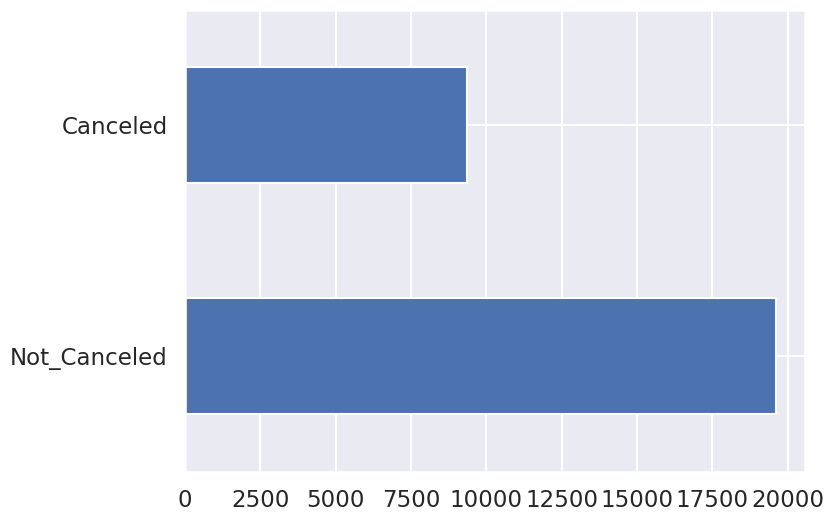

In [110]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_context("talk")
cur_df[target_col].value_counts().plot.barh()

looks like we **do** have class imbalance! will need to correct for this later

lets look at the data types again

In [111]:
cur_df.dtypes

Booking_ID                                      object
no_of_adults                                     int64
no_of_children                                   int64
no_of_weekend_nights                             int64
no_of_week_nights                                int64
type_of_meal_plan                               object
required_car_parking_space                       int64
room_type_reserved                              object
lead_time                                        int64
arrival_year                                     int64
arrival_month                                    int64
arrival_date                                     int64
market_segment_type                             object
repeated_guest                                   int64
no_of_previous_cancellations                     int64
no_of_previous_bookings_not_canceled             int64
avg_price_per_room                             float64
no_of_special_requests                           int64
booking_st

lets split the columns into 3 groups:
+ values (ints and floats)
+ categories (object types)
+ datetime (full arrival date)

In [112]:
value_cols = cur_df.dtypes[((cur_df.dtypes == float) | (cur_df.dtypes == int))].index.tolist()
value_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [113]:
cat_cols = cur_df.dtypes[cur_df.dtypes == object].index.tolist()
cat_cols

['Booking_ID',
 'type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

In [114]:
dt_col = ['full_arrival_date']
dt_col

['full_arrival_date']

Well count the number of unique values in each value column
+ bar plot for low number of unique values
+ density plot for high number of unique values

In [115]:
for a_col in value_cols:
    print(f"{a_col}: {cur_df[a_col].value_counts().shape[0]}")


no_of_adults: 5
no_of_children: 6
no_of_weekend_nights: 8
no_of_week_nights: 18
required_car_parking_space: 2
lead_time: 322
arrival_year: 2
arrival_month: 12
arrival_date: 31
repeated_guest: 2
no_of_previous_cancellations: 7
no_of_previous_bookings_not_canceled: 47
avg_price_per_room: 3324
no_of_special_requests: 6


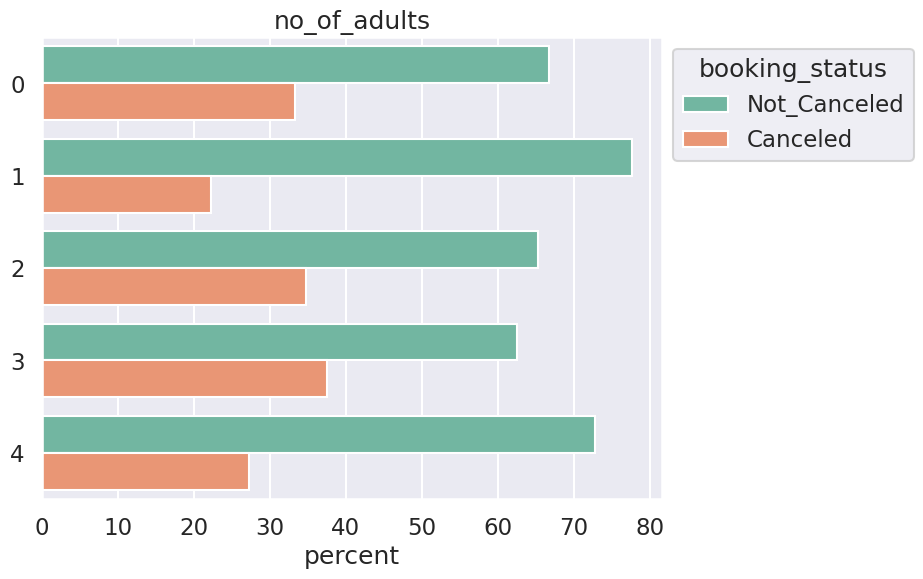

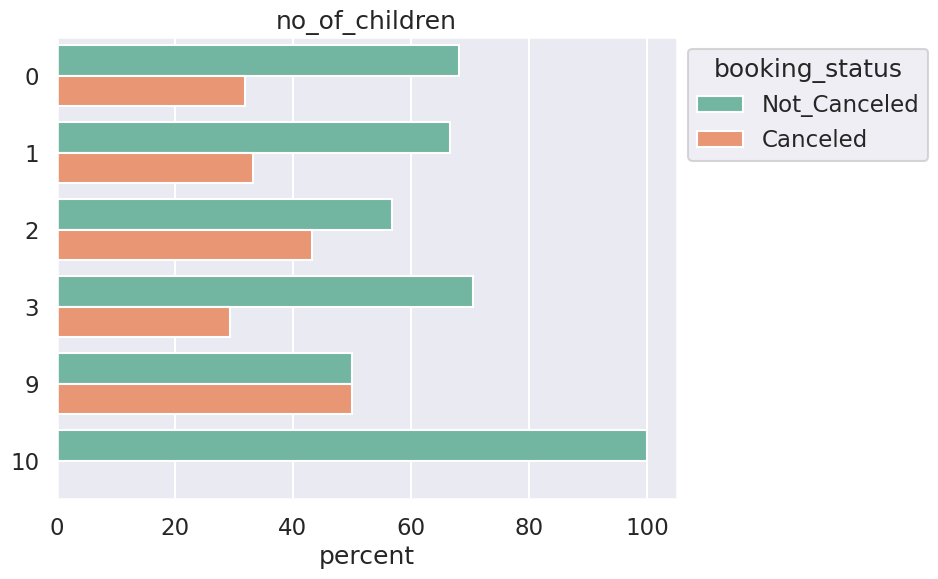

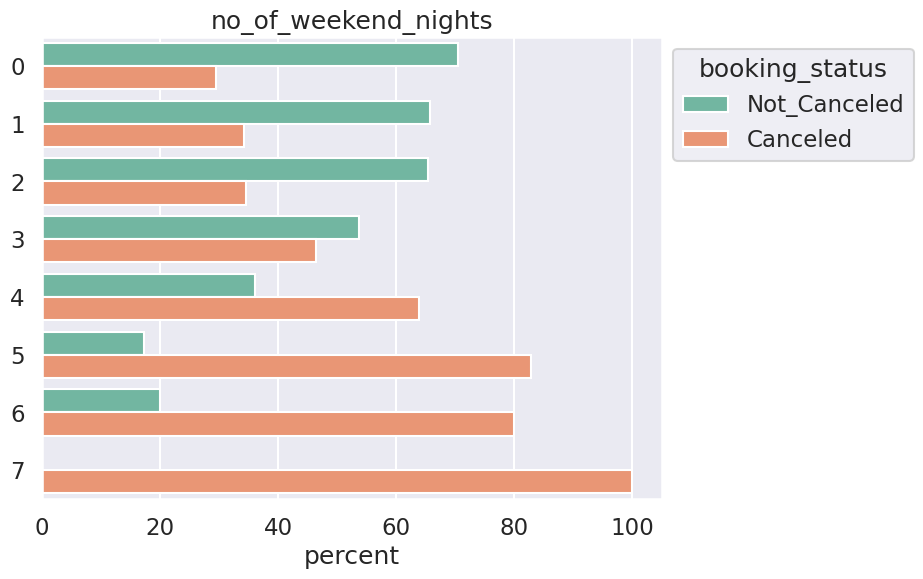

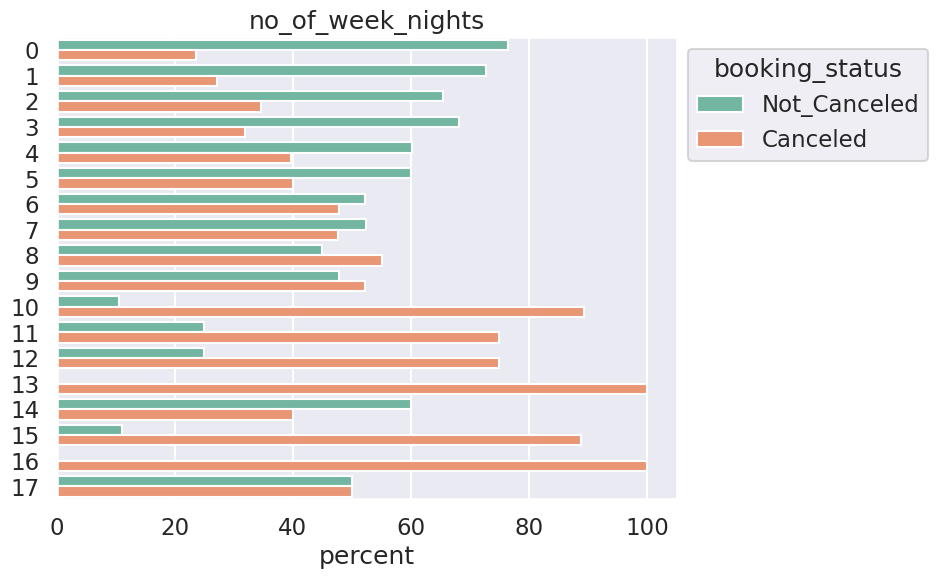

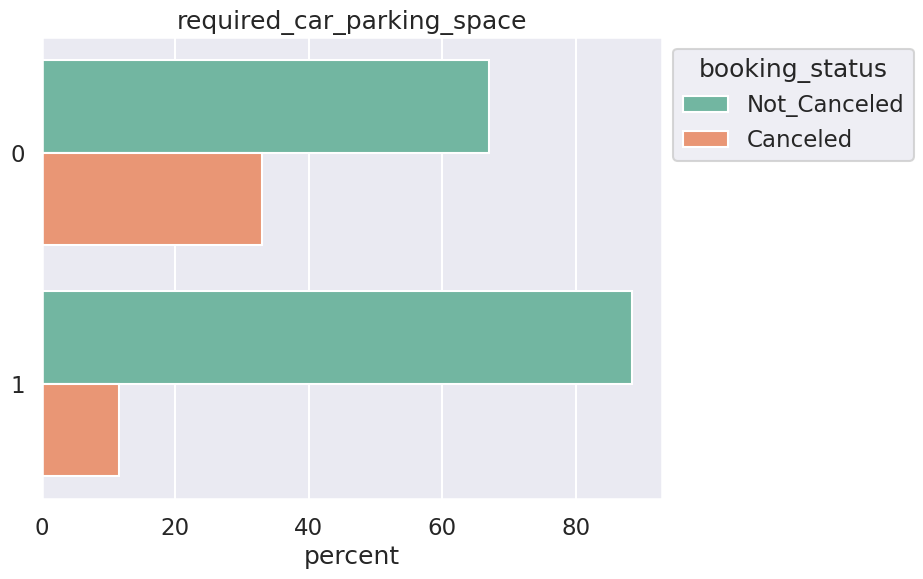

<Figure size 800x600 with 0 Axes>

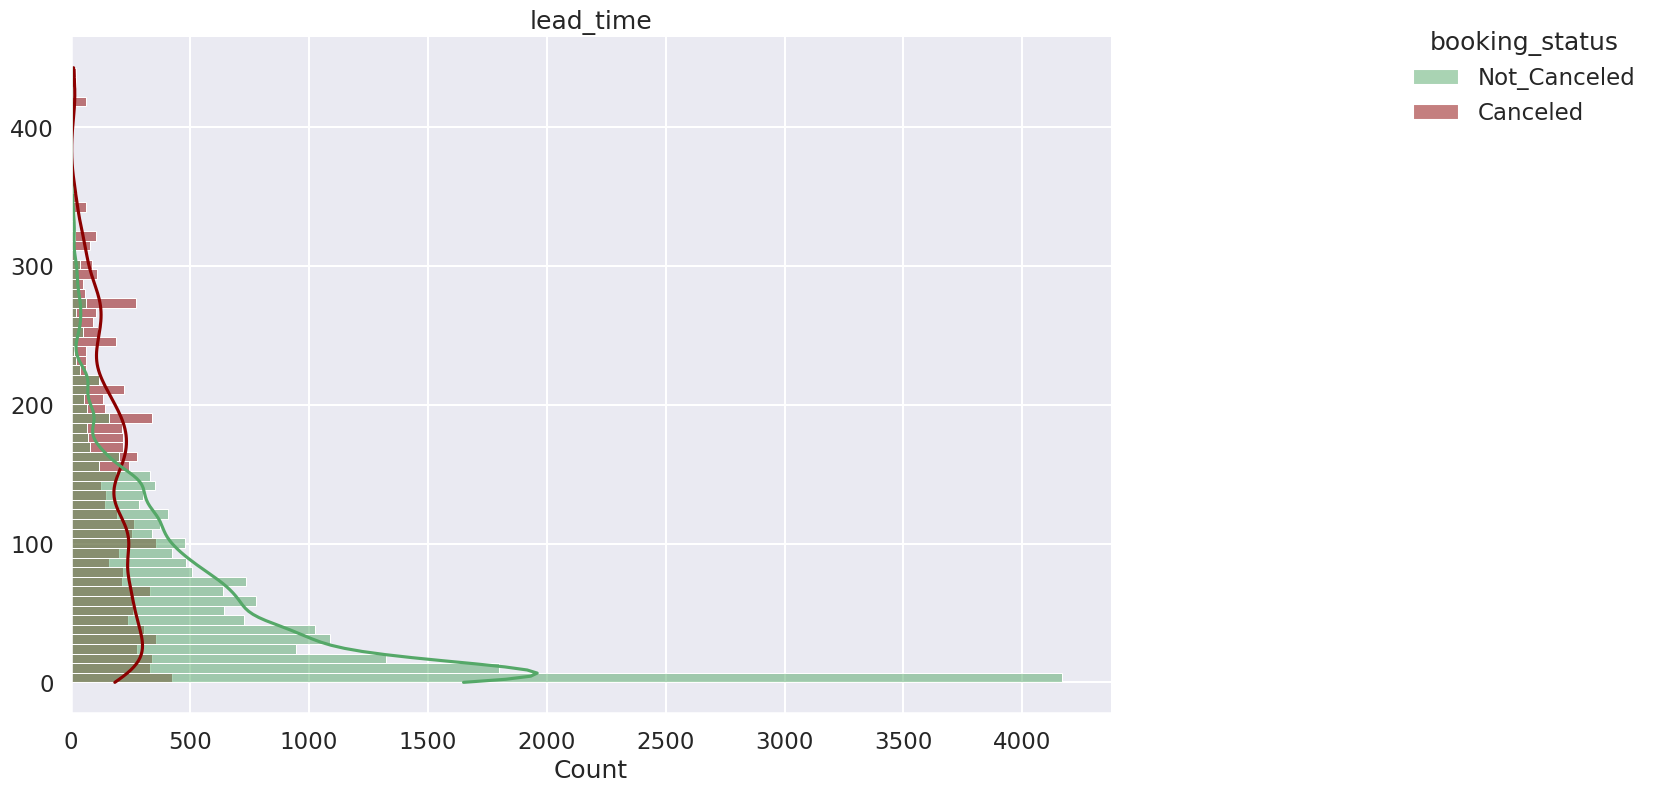

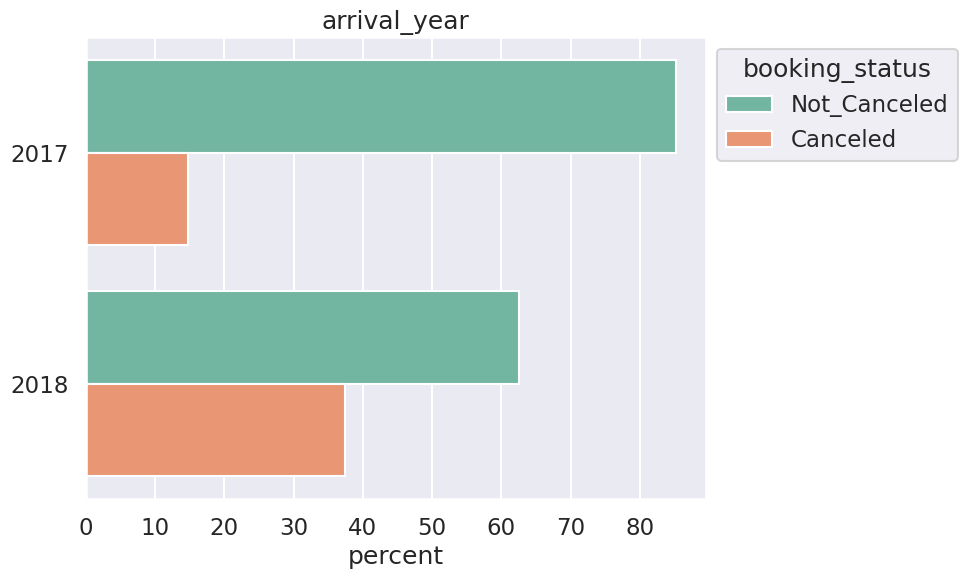

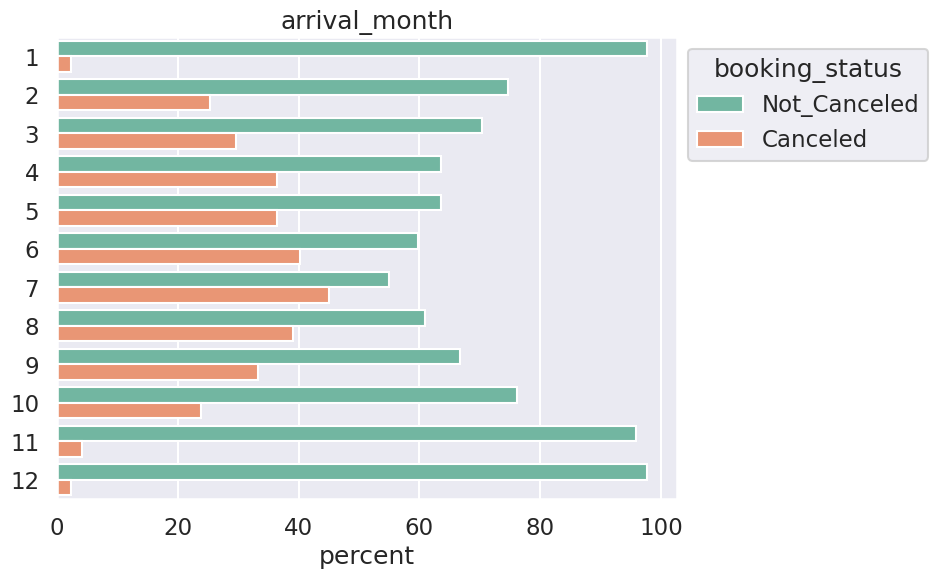

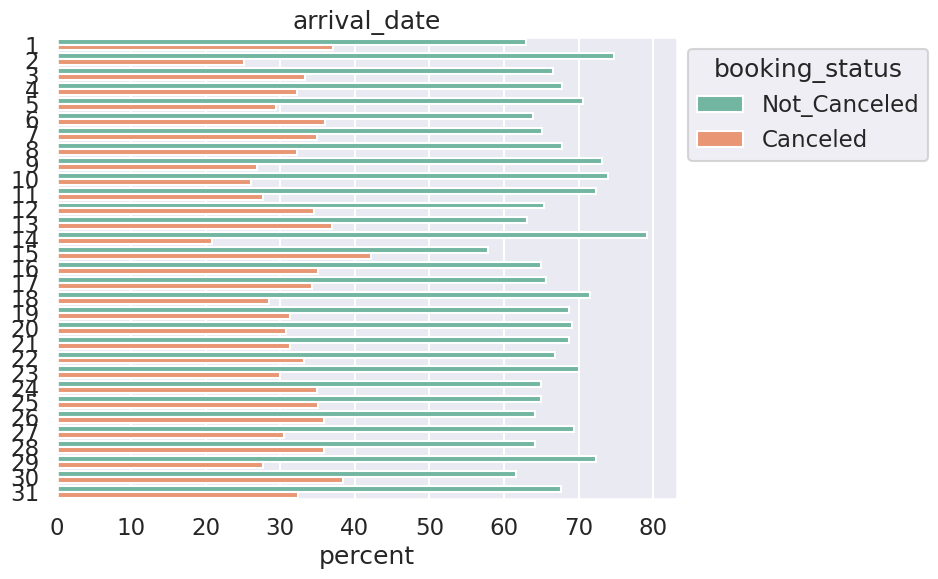

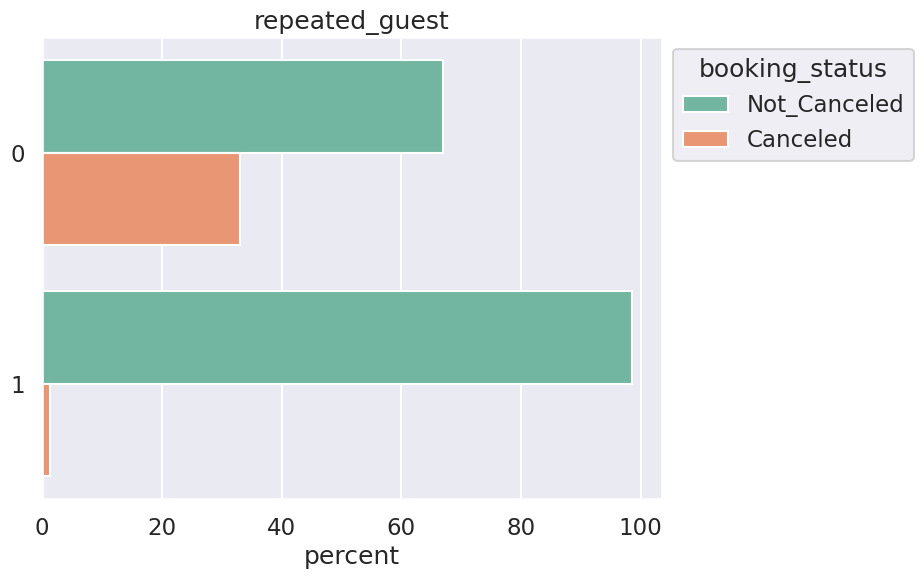

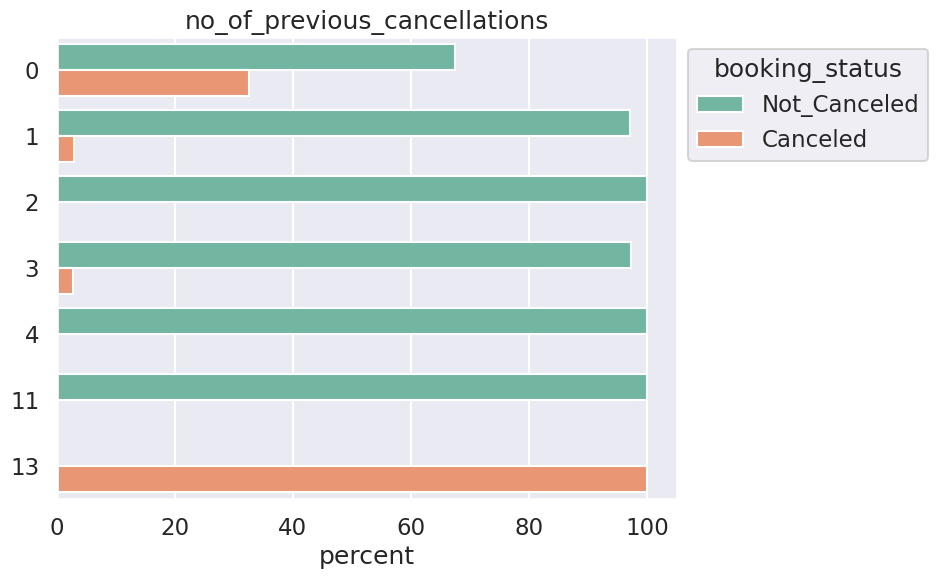

<Figure size 800x600 with 0 Axes>

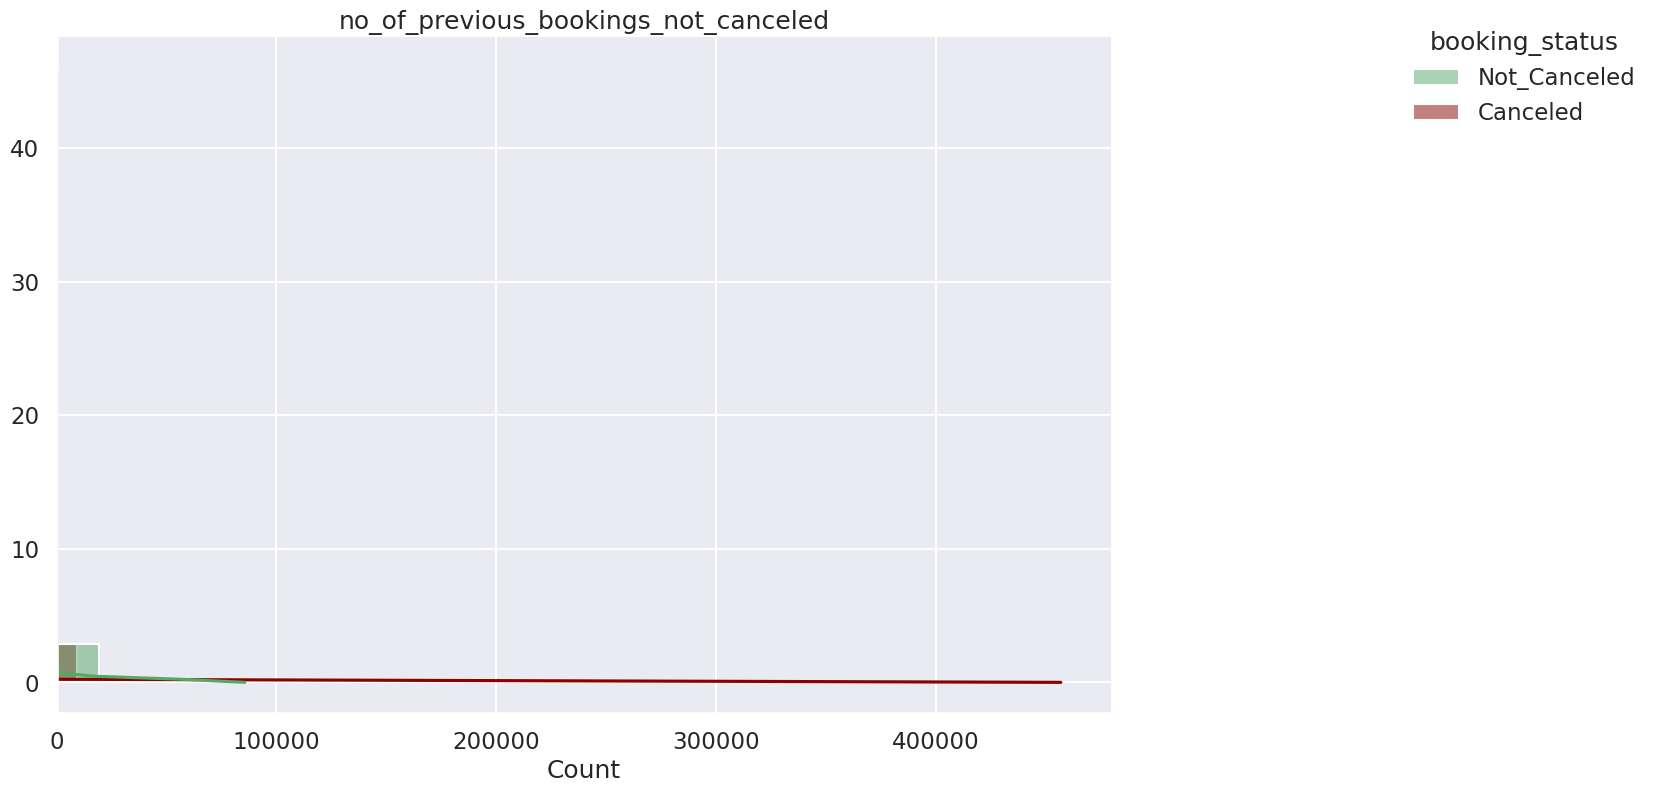

<Figure size 800x600 with 0 Axes>

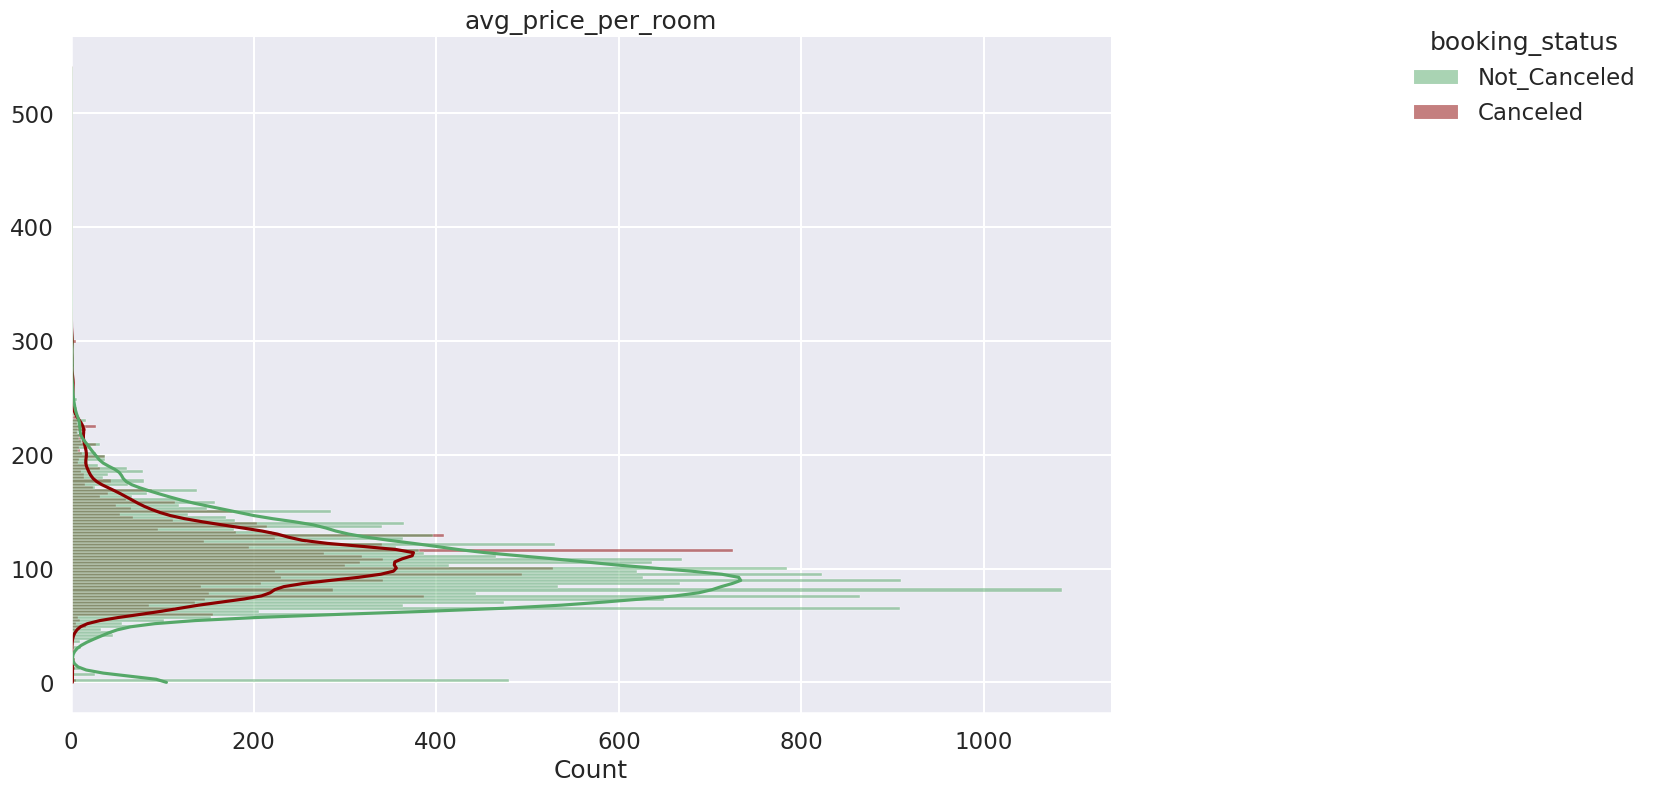

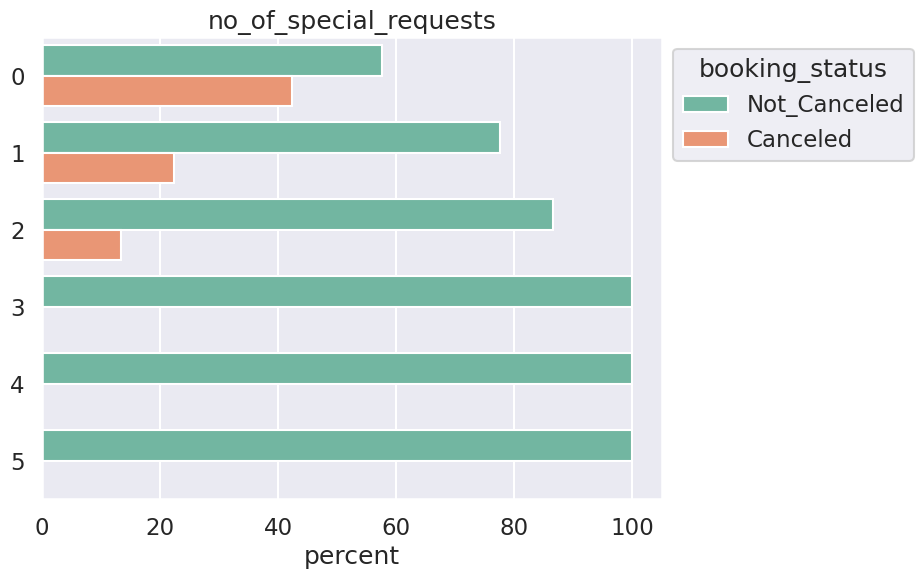

In [116]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_context("talk")
sns.set_palette('Set2')
for a_col in value_cols:
    n_unq_vals = cur_df[a_col].value_counts().shape[0]
    if n_unq_vals <= 31:
        tmp_df = cur_df.groupby(a_col)[target_col].value_counts(normalize=True).mul(100).rename('percent').reset_index().copy()
        plt.figure()
        ax = sns.barplot(data=tmp_df, y=a_col, x='percent', hue=target_col, orient='h')
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        ax.set( ylabel=None, title=a_col)
    else:
        plt.figure()
        ax = sns.displot(data=cur_df.sort_values(target_col, ascending=False), y=a_col, hue=target_col, kde=True, aspect=1.5, height=8, palette=['g', 'darkred'])
        ax.set( ylabel=None, title=a_col)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Well count the number of unique values in each category column
+ bar plot for low number of unique values
+ density plot for high number of unique values

In [117]:
for a_col in cat_cols:
    print(f"{a_col}: {cur_df[a_col].value_counts().shape[0]}")


Booking_ID: 28954
type_of_meal_plan: 4
room_type_reserved: 7
market_segment_type: 5
booking_status: 2


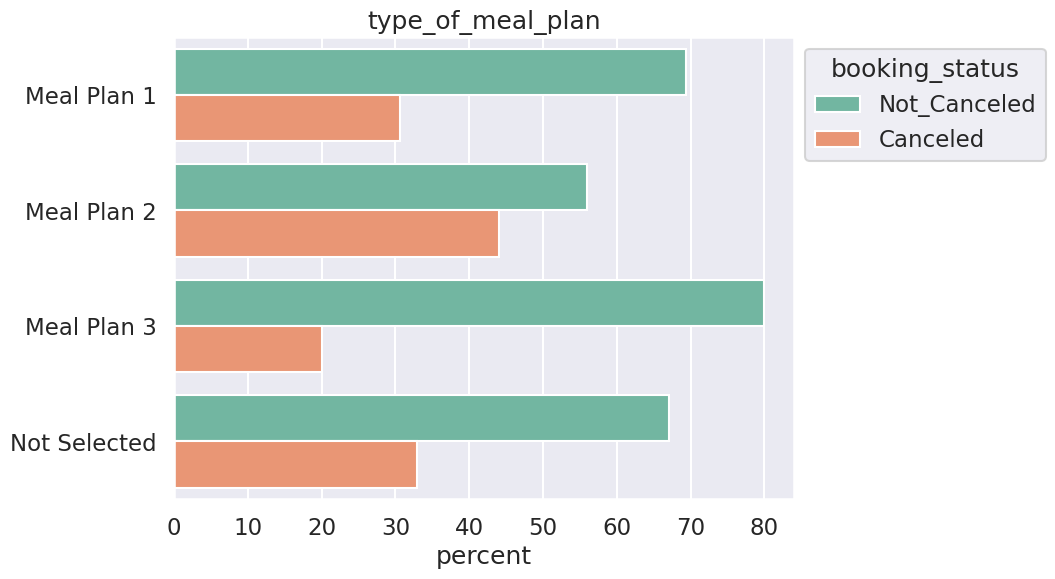

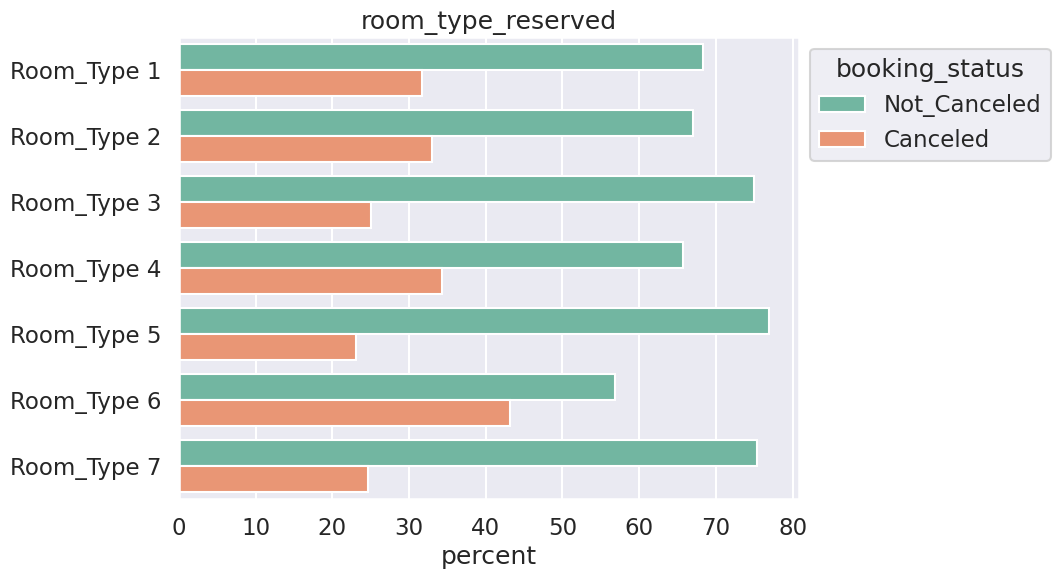

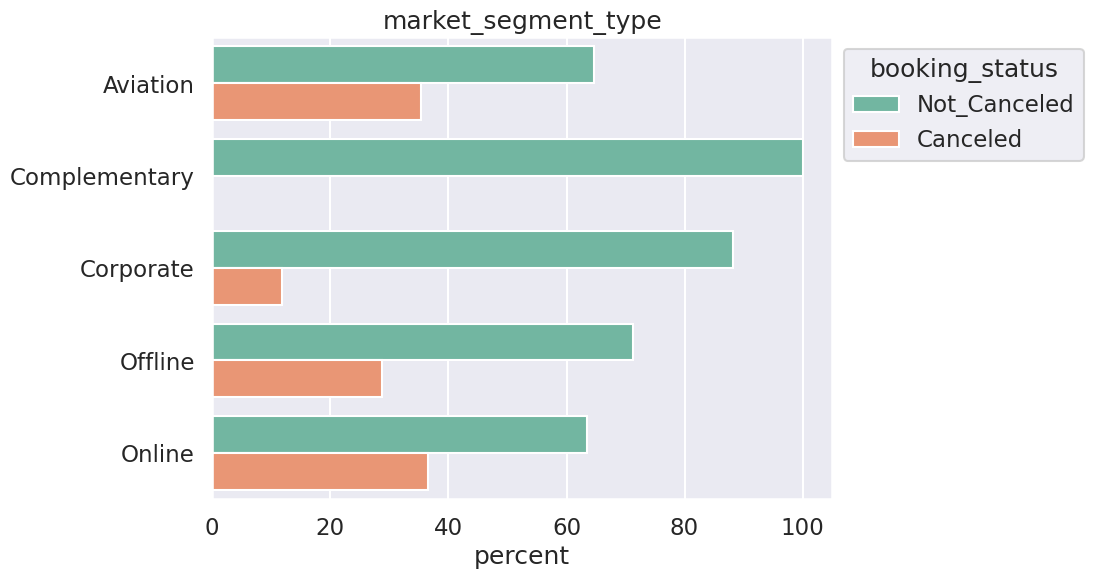

In [118]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_context("talk")
sns.set_palette('Set2')
for a_col in cat_cols:
    if (a_col == 'Booking_ID') | (a_col == target_col):
        continue
    n_unq_vals = cur_df[a_col].value_counts().shape[0]
    if n_unq_vals <= 7:
        tmp_df = cur_df.groupby(a_col)[target_col].value_counts(normalize=True).mul(100).rename('percent').reset_index().copy()
        plt.figure()
        ax = sns.barplot(data=tmp_df, y=a_col, x='percent', hue=target_col, orient='h')
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        ax.set(ylabel=None, title=a_col)
    else:
        plt.figure()
        ax = sns.displot(data=cur_df.sort_values(target_col, ascending=False), y=a_col, hue=target_col, kde=True, aspect=1.5, height=8, palette=['g', 'darkred'])
        ax.set( ylabel=None, title=a_col)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Finally, do a histogram for our full arrival date

<Figure size 800x600 with 0 Axes>

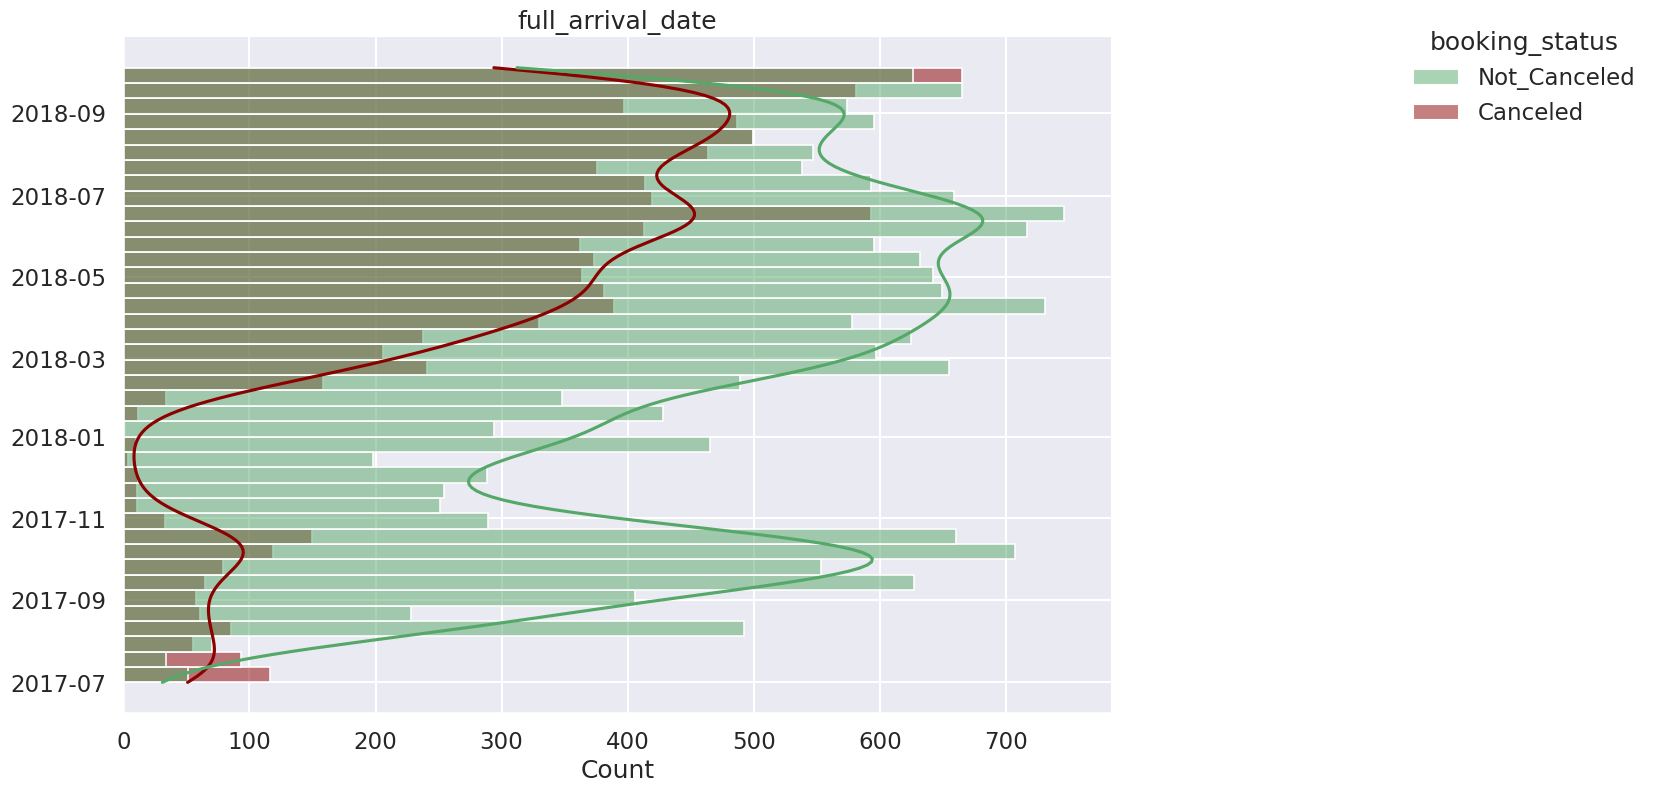

In [119]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_context("talk")
sns.set_palette('Set2')
for a_col in dt_col:
    plt.figure()
    ax = sns.displot(data=cur_df.sort_values(target_col, ascending=False), y=a_col, hue=target_col, kde=True, aspect=1.5, height=8, palette=['g', 'darkred'])#, hue_order=['Canceled', 'Not_Canceled'], palette=['coral', 'g'])
    ax.set( ylabel=None, title=a_col)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Feature engineering
Lets create a variable for 'day of week,' which could have an impact our target variable.

If I had more access to the booking data, i'd add
+ Lat & Lon coordinates based on IP address; to get location of booking
+ lat & lon coordinated of destination
+ maybe a month-ahead weather forcast for the destination

In [120]:
def add_dow(df):
    df['day_of_week'] = df['full_arrival_date'].dt.dayofweek
    return df

def add_season(df):
    df['season'] = 'winter'
    df.loc[df['arrival_month'].isin([3,4,5]), 'season'] = 'spring'
    df.loc[df['arrival_month'].isin([6,7,8]), 'season'] = 'summer'
    df.loc[df['arrival_month'].isin([9,10,11]), 'season'] = 'autumn'
    return df

In [121]:
cur_df = add_dow(cur_df)
cur_df = add_season(cur_df)

## Build Encoders
we will create one-hot-encoders for all cateogric variables

In [122]:
from sklearn.preprocessing import OneHotEncoder

In [123]:
cat_cols

['Booking_ID',
 'type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

In [124]:
excluded_cat_cols = ['Booking_ID', 'booking_status']

In [125]:
# val_cols_for_cat_enc = ['day_of_week', 'arrival_month', 'season']
val_cols_for_cat_enc = ['season']

In [126]:
enc_cat_cols = list(set(cat_cols) - set(excluded_cat_cols)) + val_cols_for_cat_enc
enc_cat_cols

['type_of_meal_plan', 'market_segment_type', 'room_type_reserved', 'season']

In [127]:
all_encoders = {}
for a_col in enc_cat_cols:
    all_encoders[a_col] = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    all_encoders[a_col].fit(cur_df[a_col].values.reshape(-1,1))

## Build Scalers
we will build min-max scalers for all value columns 

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
value_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

we will not scale the following columns
+ **required_car_parking_space**: this is a boolean value
+ **repeated_guest**: this is a boolean values
+ **arrival_year**: don't want to anchor to this value

In [130]:
# excluded_value_cols = ['required_car_parking_space', 'repeated_guest', 'arrival_year']
excluded_value_cols = ['required_car_parking_space', 'repeated_guest'] 

In [131]:
scale_value_cols = list(set(value_cols) - set(excluded_value_cols) - set(val_cols_for_cat_enc)) + ['day_of_week']
# scale_value_cols = list(set(value_cols) - set(excluded_value_cols)) + ['day_of_week', 'season']
scale_value_cols

['no_of_special_requests',
 'no_of_previous_cancellations',
 'no_of_week_nights',
 'no_of_weekend_nights',
 'no_of_adults',
 'arrival_year',
 'avg_price_per_room',
 'arrival_date',
 'no_of_previous_bookings_not_canceled',
 'arrival_month',
 'no_of_children',
 'lead_time',
 'day_of_week']

In [132]:
all_scalers = {}
for a_col in scale_value_cols:
    all_scalers[a_col] = MinMaxScaler()
    all_scalers[a_col].fit(cur_df[a_col].values.reshape(-1,1))

## build transformation pipeline

first lets define our input columns

In [133]:
inpt_cols = list(set(value_cols).difference(set(excluded_value_cols))) + list(set(cat_cols).difference(set(excluded_cat_cols))) + ['day_of_week', 'season'] + excluded_value_cols
inpt_cols

['no_of_special_requests',
 'no_of_previous_cancellations',
 'no_of_week_nights',
 'no_of_weekend_nights',
 'no_of_adults',
 'arrival_year',
 'avg_price_per_room',
 'arrival_date',
 'no_of_previous_bookings_not_canceled',
 'lead_time',
 'arrival_month',
 'no_of_children',
 'type_of_meal_plan',
 'market_segment_type',
 'room_type_reserved',
 'day_of_week',
 'season',
 'required_car_parking_space',
 'repeated_guest']

first we will do one hot encoding transforms

In [134]:
def one_hot_transf_series(a_series, 
                          an_enc,
                         ):
    base_col_name = a_series.name
    
    enc_vals = an_enc.transform(a_series.values.reshape(-1,1))
    n_cols = enc_vals.shape[1]
    
    new_col_names = [f"{base_col_name}_{str(col_num)}" for col_num in np.arange(n_cols)]
    
    new_df = pd.DataFrame(enc_vals, columns=new_col_names, index=a_series.index)
    
    return new_df

def one_hot_transf_df(a_df, 
                      a_col, 
                      an_enc,
                     ):
    
    out_df = a_df.copy()
    new_df = one_hot_transf_series(out_df[a_col], an_enc)
    out_df = out_df.drop(columns=[a_col])
    out_df = pd.concat([out_df, new_df], axis=1)
    
    return out_df
    
def all_enc_transf_df(a_df, 
                     all_encoders=all_encoders,
                     ):
    out_df = a_df.copy()
    
    for a_col, an_enc in all_encoders.items():
        out_df = one_hot_transf_df(out_df, a_col, an_enc)
        
    return out_df
    

In [135]:
one_hot_transf_series(cur_df['type_of_meal_plan'], all_encoders['type_of_meal_plan'])
# one_hot_transf_series(df_val_ts['type_of_meal_plan'], all_encoders['type_of_meal_plan'])

,type_of_meal_plan_0,type_of_meal_plan_1,type_of_meal_plan_2,type_of_meal_plan_3
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
28949,1.0,0.0,0.0,0.0
28950,1.0,0.0,0.0,0.0
28951,1.0,0.0,0.0,0.0
28952,1.0,0.0,0.0,0.0


In [136]:
one_hot_transf_df(cur_df, 'type_of_meal_plan', all_encoders['type_of_meal_plan'])
# one_hot_transf_df(df_val_ts, 'type_of_meal_plan', all_encoders['type_of_meal_plan'])

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,avg_price_per_room,no_of_special_requests,booking_status,full_arrival_date,day_of_week,season,type_of_meal_plan_0,type_of_meal_plan_1,type_of_meal_plan_2,type_of_meal_plan_3
0,INN09777,2,0,0,2,0,Room_Type 1,257,2017,7,...,101.50,0,Canceled,2017-07-01,5,summer,0.0,1.0,0.0,0.0
1,INN26322,2,0,0,2,0,Room_Type 1,257,2017,7,...,101.50,0,Canceled,2017-07-01,5,summer,0.0,1.0,0.0,0.0
2,INN06451,2,0,0,2,0,Room_Type 1,257,2017,7,...,101.50,0,Canceled,2017-07-01,5,summer,0.0,1.0,0.0,0.0
3,INN08763,1,0,0,2,0,Room_Type 1,257,2017,7,...,80.00,0,Not_Canceled,2017-07-01,5,summer,0.0,1.0,0.0,0.0
4,INN13728,2,0,0,2,0,Room_Type 1,257,2017,7,...,101.50,0,Canceled,2017-07-01,5,summer,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28949,INN25900,3,0,0,2,0,Room_Type 1,22,2018,10,...,115.00,0,Not_Canceled,2018-10-05,4,autumn,1.0,0.0,0.0,0.0
28950,INN33877,3,0,2,5,0,Room_Type 4,144,2018,10,...,151.20,0,Canceled,2018-10-05,4,autumn,1.0,0.0,0.0,0.0
28951,INN26245,1,0,0,1,0,Room_Type 1,0,2018,10,...,95.00,0,Not_Canceled,2018-10-05,4,autumn,1.0,0.0,0.0,0.0
28952,INN10094,3,0,0,2,0,Room_Type 4,29,2018,10,...,201.25,3,Not_Canceled,2018-10-05,4,autumn,1.0,0.0,0.0,0.0


In [137]:
all_enc_transf_df(cur_df)
# all_enc_transf_df(df_val_ts)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,room_type_reserved_1,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,season_0,season_1,season_2,season_3
0,INN09777,2,0,0,2,0,257,2017,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,INN26322,2,0,0,2,0,257,2017,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,INN06451,2,0,0,2,0,257,2017,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,INN08763,1,0,0,2,0,257,2017,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,INN13728,2,0,0,2,0,257,2017,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28949,INN25900,3,0,0,2,0,22,2018,10,5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28950,INN33877,3,0,2,5,0,144,2018,10,5,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28951,INN26245,1,0,0,1,0,0,2018,10,5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28952,INN10094,3,0,0,2,0,29,2018,10,5,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


next we will do the values transform

In [138]:
def scale_tranf_df(a_df, 
                   all_scalers=all_scalers,
                  ):
    
    df_out = a_df.copy() 
    
    for a_col, a_scaler in all_scalers.items():
        df_out[a_col] = a_scaler.transform(df_out[a_col].values.reshape(-1,1))
    
    return df_out



In [139]:
scale_tranf_df(cur_df)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,full_arrival_date,day_of_week,season
0,INN09777,0.50,0.0,0.000000,0.117647,Meal Plan 2,0,Room_Type 1,0.580135,0.0,...,Offline,0,0.0,0.000000,0.187963,0.0,Canceled,2017-07-01,0.833333,summer
1,INN26322,0.50,0.0,0.000000,0.117647,Meal Plan 2,0,Room_Type 1,0.580135,0.0,...,Offline,0,0.0,0.000000,0.187963,0.0,Canceled,2017-07-01,0.833333,summer
2,INN06451,0.50,0.0,0.000000,0.117647,Meal Plan 2,0,Room_Type 1,0.580135,0.0,...,Online,0,0.0,0.000000,0.187963,0.0,Canceled,2017-07-01,0.833333,summer
3,INN08763,0.25,0.0,0.000000,0.117647,Meal Plan 2,0,Room_Type 1,0.580135,0.0,...,Offline,0,0.0,0.000000,0.148148,0.0,Not_Canceled,2017-07-01,0.833333,summer
4,INN13728,0.50,0.0,0.000000,0.117647,Meal Plan 2,0,Room_Type 1,0.580135,0.0,...,Offline,0,0.0,0.000000,0.187963,0.0,Canceled,2017-07-01,0.833333,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28949,INN25900,0.75,0.0,0.000000,0.117647,Meal Plan 1,0,Room_Type 1,0.049661,1.0,...,Offline,0,0.0,0.000000,0.212963,0.0,Not_Canceled,2018-10-05,0.666667,autumn
28950,INN33877,0.75,0.0,0.285714,0.294118,Meal Plan 1,0,Room_Type 4,0.325056,1.0,...,Online,0,0.0,0.000000,0.280000,0.0,Canceled,2018-10-05,0.666667,autumn
28951,INN26245,0.25,0.0,0.000000,0.058824,Meal Plan 1,0,Room_Type 1,0.000000,1.0,...,Corporate,1,0.0,0.065217,0.175926,0.0,Not_Canceled,2018-10-05,0.666667,autumn
28952,INN10094,0.75,0.0,0.000000,0.117647,Meal Plan 1,0,Room_Type 4,0.065463,1.0,...,Online,0,0.0,0.000000,0.372685,0.6,Not_Canceled,2018-10-05,0.666667,autumn


finally, define and input_pipeline

In [140]:
def inp_pipe_df(a_df, 
               all_scalers=all_scalers,
               all_encoders=all_encoders,
               ):
    out_df = a_df.copy()
    out_df = add_dow(out_df)
    out_df = add_season(out_df)
    out_df = out_df[inpt_cols]
    out_df = scale_tranf_df(out_df, all_scalers)
    out_df = all_enc_transf_df(out_df, all_encoders)
    
    return out_df.astype(float)
    
def tar_pipe_ser(a_df, pos_val='Canceled'):
    out_ser = a_df[target_col].copy()
    out_ser[out_ser != pos_val] = '0'
    out_ser[out_ser == pos_val] = '1'
    out_ser = out_ser.astype(float)
    return out_ser
    

In [141]:
inp_pipe_df(cur_df)

,no_of_special_requests,no_of_previous_cancellations,no_of_week_nights,no_of_weekend_nights,no_of_adults,arrival_year,avg_price_per_room,arrival_date,no_of_previous_bookings_not_canceled,lead_time,...,room_type_reserved_1,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,season_0,season_1,season_2,season_3
0,0.0,0.0,0.117647,0.000000,0.50,0.0,0.187963,0.000000,0.000000,0.580135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.117647,0.000000,0.50,0.0,0.187963,0.000000,0.000000,0.580135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.117647,0.000000,0.50,0.0,0.187963,0.000000,0.000000,0.580135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.117647,0.000000,0.25,0.0,0.148148,0.000000,0.000000,0.580135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.117647,0.000000,0.50,0.0,0.187963,0.000000,0.000000,0.580135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28949,0.0,0.0,0.117647,0.000000,0.75,1.0,0.212963,0.133333,0.000000,0.049661,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28950,0.0,0.0,0.294118,0.285714,0.75,1.0,0.280000,0.133333,0.000000,0.325056,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28951,0.0,0.0,0.058824,0.000000,0.25,1.0,0.175926,0.133333,0.065217,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28952,0.6,0.0,0.117647,0.000000,0.75,1.0,0.372685,0.133333,0.000000,0.065463,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [142]:
inp_pipe_df(cur_df).iloc[0]

no_of_special_requests                  0.000000
no_of_previous_cancellations            0.000000
no_of_week_nights                       0.117647
no_of_weekend_nights                    0.000000
no_of_adults                            0.500000
arrival_year                            0.000000
avg_price_per_room                      0.187963
arrival_date                            0.000000
no_of_previous_bookings_not_canceled    0.000000
lead_time                               0.580135
arrival_month                           0.545455
no_of_children                          0.000000
day_of_week                             0.833333
required_car_parking_space              0.000000
repeated_guest                          0.000000
type_of_meal_plan_0                     0.000000
type_of_meal_plan_1                     1.000000
type_of_meal_plan_2                     0.000000
type_of_meal_plan_3                     0.000000
market_segment_type_0                   0.000000
market_segment_type_

In [143]:
tar_pipe_ser(cur_df)

0        1.0
1        1.0
2        1.0
3        0.0
4        1.0
        ... 
28949    0.0
28950    1.0
28951    0.0
28952    0.0
28953    1.0
Name: booking_status, Length: 28954, dtype: float64

## modeling

In [144]:
from sklearn.linear_model import LogisticRegression
from joblib import parallel_backend
from xgboost import XGBClassifier

In [145]:
x_train = inp_pipe_df(cur_train)
y_train = tar_pipe_ser(cur_train)

x_val = inp_pipe_df(cur_val)
y_val = tar_pipe_ser(cur_val)

x_test = inp_pipe_df(cur_test)
y_test = tar_pipe_ser(cur_test)

### Logistic Regression

#### no class imbalance correction

In [146]:
%%time
with parallel_backend('threading', n_jobs=48):
    if do_rand_seed:
        logit = LogisticRegression(penalty=None, max_iter=1000, random_state=rand_seed)
    else:
        logit = LogisticRegression(penalty=None, max_iter=1000)
    logit.fit(x_train, y_train)

CPU times: user 6.68 s, sys: 24.2 s, total: 30.9 s
Wall time: 693 ms


In [147]:
val_preds = logit.predict(x_val)

In [148]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

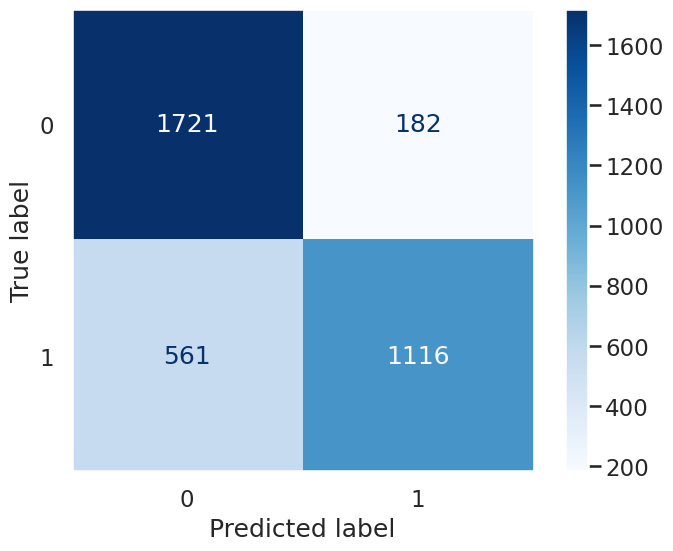

In [149]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_context("talk")
cm = confusion_matrix(y_val, val_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=sns.color_palette("Blues", as_cmap=True))
plt.grid(visible=None)

In [150]:
f1 = sk.metrics.f1_score(y_val, val_preds)
print(f"F1: {f1}")
auc = sk.metrics.roc_auc_score(y_val, val_preds)
print(f"AUC: {auc}")
recall = sk.metrics.recall_score(y_val, val_preds)
print(f"Recall: {recall}")
precision = sk.metrics.precision_score(y_val, val_preds)
print(f"Precision: {precision}")
accuracy = sk.metrics.accuracy_score(y_val, val_preds)
print(f"Accuracy: {accuracy}")

F1: 0.7502521008403362
AUC: 0.7849177976211179
Recall: 0.6654740608228981
Precision: 0.8597842835130971
Accuracy: 0.7924581005586592


#### with class imbalance correction

In [151]:
%%time
with parallel_backend('threading', n_jobs=48):
    if do_rand_seed:
        logit = LogisticRegression(penalty=None, max_iter=1000, random_state=rand_seed, class_weight='balanced')
    else:
        logit = LogisticRegression(penalty=None, max_iter=1000, class_weight='balanced')
    logit.fit(x_train, y_train)

CPU times: user 6.67 s, sys: 25.4 s, total: 32 s
Wall time: 716 ms


In [152]:
val_preds = logit.predict(x_val)

In [153]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

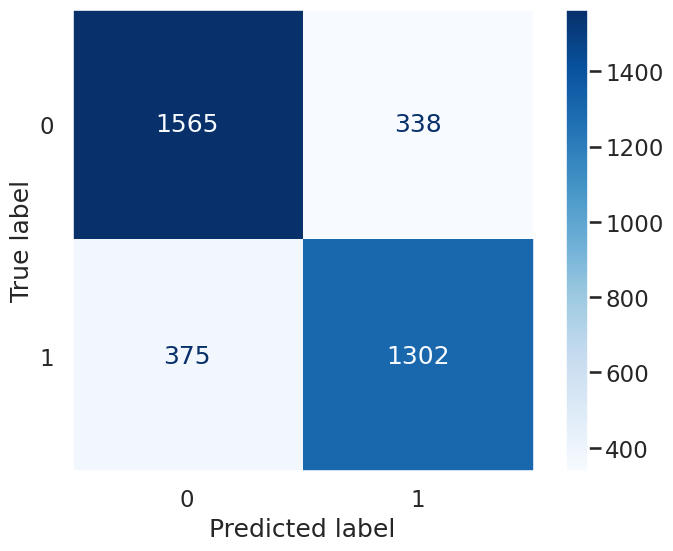

In [154]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_context("talk")
cm = confusion_matrix(y_val, val_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=sns.color_palette("Blues", as_cmap=True))
plt.grid(visible=None)

In [155]:
f1 = sk.metrics.f1_score(y_val, val_preds)
print(f"F1: {f1}")
auc = sk.metrics.roc_auc_score(y_val, val_preds)
print(f"AUC: {auc}")
recall = sk.metrics.recall_score(y_val, val_preds)
print(f"Recall: {recall}")
precision = sk.metrics.precision_score(y_val, val_preds)
print(f"Precision: {precision}")
accuracy = sk.metrics.accuracy_score(y_val, val_preds)
print(f"Accuracy: {accuracy}")

F1: 0.7850467289719626
AUC: 0.7993860555360757
Recall: 0.776386404293381
Precision: 0.7939024390243903
Accuracy: 0.8008379888268157


### Gradient boosting

In [156]:
if do_rand_seed:
    xgb = XGBClassifier(use_label_encoder=False, random_state=rand_seed)
else:
     xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(x_train, y_train)

/home/jcosme/miniconda3/envs/p1-dlds/lib/python3.11/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [157]:
val_preds = xgb.predict(x_val)

In [158]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

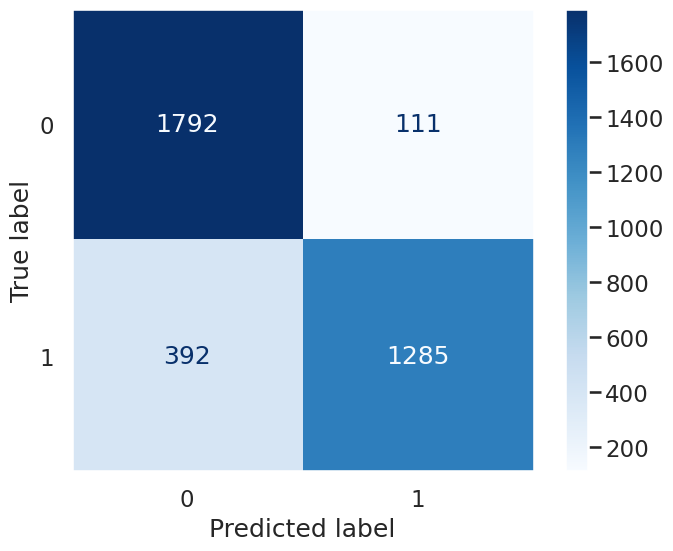

In [159]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_context("talk")
cm = confusion_matrix(y_val, val_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=sns.color_palette("Blues", as_cmap=True))
plt.grid(visible=None)

In [160]:
f1 = sk.metrics.f1_score(y_val, val_preds)
print(f"F1: {f1}")
auc = sk.metrics.roc_auc_score(y_val, val_preds)
print(f"AUC: {auc}")
recall = sk.metrics.recall_score(y_val, val_preds)
print(f"Recall: {recall}")
precision = sk.metrics.precision_score(y_val, val_preds)
print(f"Precision: {precision}")
accuracy = sk.metrics.accuracy_score(y_val, val_preds)
print(f"Accuracy: {accuracy}")

F1: 0.8363163032866905
AUC: 0.8539601501693181
Recall: 0.7662492546213476
Precision: 0.920487106017192
Accuracy: 0.8594972067039106


In [161]:
### Gradient boosting with scaled positive weights (for class imbalance)

In [162]:
scale_pos_weight = (y_train.shape[0] - y_train.sum()) / y_train.sum()
scale_pos_weight

2.093706592584678

In [163]:

if do_rand_seed:
    xgb = XGBClassifier(use_label_encoder=False, 
                   scale_pos_weight=scale_pos_weight,
                 random_state=rand_seed,
                       )
else:
     xgb = XGBClassifier(use_label_encoder=False, 
                   scale_pos_weight=scale_pos_weight,
                   )
xgb.fit(x_train, y_train)

/home/jcosme/miniconda3/envs/p1-dlds/lib/python3.11/site-packages/xgboost/sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [164]:
val_preds = xgb.predict(x_val)

In [165]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

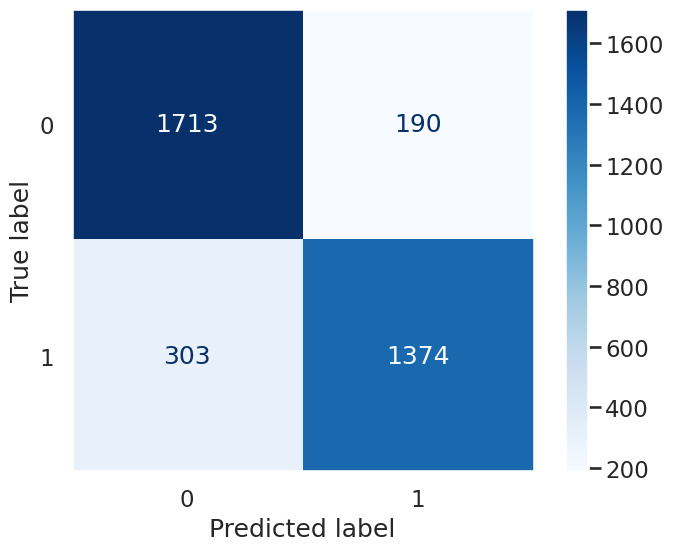

In [166]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_context("talk")
cm = confusion_matrix(y_val, val_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=sns.color_palette("Blues", as_cmap=True))
plt.grid(visible=None)

In [167]:
f1 = sk.metrics.f1_score(y_val, val_preds)
print(f"F1: {f1}")
auc = sk.metrics.roc_auc_score(y_val, val_preds)
print(f"AUC: {auc}")
recall = sk.metrics.recall_score(y_val, val_preds)
print(f"Recall: {recall}")
precision = sk.metrics.precision_score(y_val, val_preds)
print(f"Precision: {precision}")
accuracy = sk.metrics.accuracy_score(y_val, val_preds)
print(f"Accuracy: {accuracy}")

F1: 0.8478864547979018
AUC: 0.8597389302457188
Recall: 0.8193202146690519
Precision: 0.8785166240409207
Accuracy: 0.8622905027932961


### Hyper-parameter Optimization

In [168]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [169]:
space={'max_depth': hp.randint("max_depth", 1, 50),
            'gamma': hp.uniform ('gamma', .01,9),
            'n_estimators': hp.randint("n_estimators", 10, 300),
           'learning_rate': hp.uniform('learning_rate', 0.001 ,0.4),
           'scale_pos_weight': hp.uniform("scale_pos_weight", .1, 10),
           'early_stopping_rounds': hp.randint("early_stopping_rounds", 1, 50),
        }

In [170]:
def objective(space):
    if do_rand_seed:
        clf=XGBClassifier(
            n_estimators=space['n_estimators'], 
            max_depth = space['max_depth'], 
            gamma = space['gamma'],
            learning_rate=space['learning_rate'],
            scale_pos_weight=space['scale_pos_weight'],
            early_stopping_rounds=space['early_stopping_rounds'],
            eval_metric="auc",
            tree_method='gpu_hist',
            random_state=rand_seed,
        )
        
    else:
        clf=XGBClassifier(
            n_estimators=space['n_estimators'], 
            max_depth = space['max_depth'], 
            gamma = space['gamma'],
            learning_rate=space['learning_rate'],
            scale_pos_weight=space['scale_pos_weight'],
            early_stopping_rounds=space['early_stopping_rounds'],
            eval_metric="auc",
            tree_method='gpu_hist',

        )
    
    evaluation = [( x_val, y_val)]
    
    clf.fit(x_train, y_train,
            eval_set=evaluation, 
            verbose=False,
           )
    

    val_preds = clf.predict(x_val)
    
    f1 = sk.metrics.f1_score(y_val, val_preds)
    # print(f"F1: {f1}")
    # auc = sk.metrics.roc_auc_score(y_val, val_preds)
    # print(f"AUC: {auc}")
    # recall = sk.metrics.recall_score(y_val, val_preds)
    # print(f"Recall: {recall}")
    # precision = sk.metrics.precision_score(y_val, val_preds)
    # print(f"Precision: {precision}")
    # accuracy = sk.metrics.accuracy_score(y_val, val_preds)
    # print(f"Accuracy: {accuracy}")

    
    return {'loss': -f1, 'status': STATUS_OK }

In [171]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

100%|██████| 100/100 [00:49<00:00,  2.01trial/s, best loss: -0.8509732360097324]


In [172]:
print(best_hyperparams)

{'early_stopping_rounds': 22, 'gamma': 1.741915629568072, 'learning_rate': 0.017807330370855, 'max_depth': 24, 'n_estimators': 240, 'scale_pos_weight': 4.387766737057552}


In [173]:
if do_rand_seed:
    xgb = XGBClassifier(
                 random_state=rand_seed,
                        eval_metric="auc",
            tree_method='gpu_hist',
        **best_hyperparams
                       )
else:
     xgb = XGBClassifier(
                         eval_metric="auc",
            tree_method='gpu_hist',
         **best_hyperparams
                   )
xgb.fit(x_train, 
        y_train,
       eval_set=[( x_val, y_val)], 
       verbose=False,
       )

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=22, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=1.741915629568072,
              gpu_id=0, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.017807330370855,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=24, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=240,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

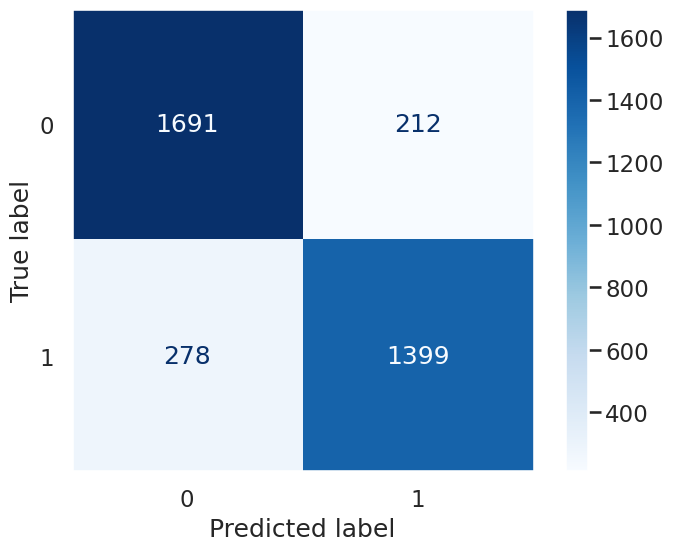

In [174]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_context("talk")
val_preds = xgb.predict(x_val)
cm = confusion_matrix(y_val, val_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=sns.color_palette("Blues", as_cmap=True))
plt.grid(visible=None)

In [175]:
f1 = sk.metrics.f1_score(y_val, val_preds)
print(f"F1: {f1}")
auc = sk.metrics.roc_auc_score(y_val, val_preds)
print(f"AUC: {auc}")
recall = sk.metrics.recall_score(y_val, val_preds)
print(f"Recall: {recall}")
precision = sk.metrics.precision_score(y_val, val_preds)
print(f"Precision: {precision}")
accuracy = sk.metrics.accuracy_score(y_val, val_preds)
print(f"Accuracy: {accuracy}")

F1: 0.8509732360097324
AUC: 0.8614123699484634
Recall: 0.8342277877161598
Precision: 0.8684047175667288
Accuracy: 0.8631284916201117


### Feature Importance

In [176]:
# Creating the importances dataframe
importances = pd.DataFrame.from_dict(xgb.get_booster().get_score(importance_type = 'weight'), orient='index')

<AxesSubplot: xlabel='0', ylabel='index'>

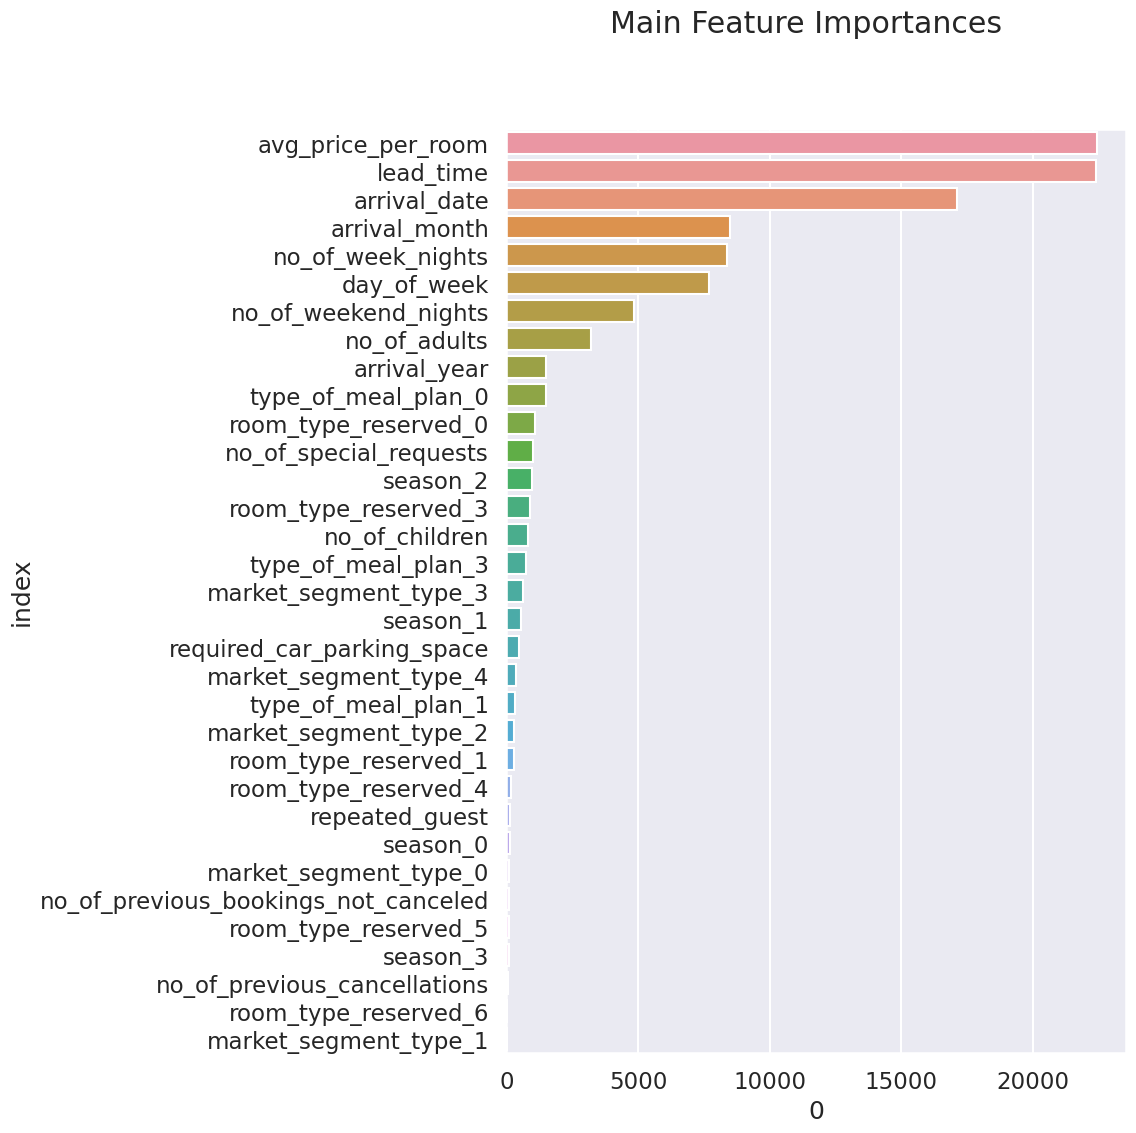

In [177]:
fig, ax = plt.subplots(1,1, figsize=(8,12))
fig.suptitle('Main Feature Importances')
sns.barplot(data=importances.reset_index().sort_values(0, ascending=False), x=0, y='index', orient='h')

### Test set evaluation

In [178]:
# save model
pickle.dump(xgb, open(model_file_name, "wb"))

In [179]:
# load model
xgb = pickle.load(open(model_file_name, "rb"))

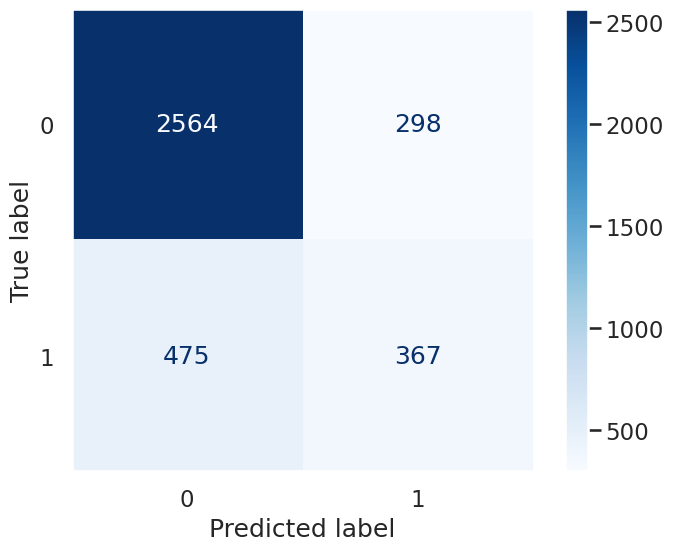

In [180]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_context("talk")
test_preds = xgb.predict(x_test)
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=sns.color_palette("Blues", as_cmap=True))
plt.grid(visible=None)

In [181]:
f1 = sk.metrics.f1_score(y_test, test_preds)
print(f"F1: {f1}")
auc = sk.metrics.roc_auc_score(y_test, test_preds)
print(f"AUC: {auc}")
recall = sk.metrics.recall_score(y_test, test_preds)
print(f"Recall: {recall}")
precision = sk.metrics.precision_score(y_test, test_preds)
print(f"Precision: {precision}")
accuracy = sk.metrics.accuracy_score(y_test, test_preds)
print(f"Accuracy: {accuracy}")

F1: 0.4870603848706039
AUC: 0.6658719962287389
Recall: 0.4358669833729216
Precision: 0.5518796992481203
Accuracy: 0.7913066954643628
